In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from mplsoccer import Pitch, Sbopen, FontManager

In [2]:
parser = Sbopen()
events, related, freeze, players = parser.event(3794691)

# EURO 2021: Welche Faktoren haben dazu geführt, dass die Schweiz das Spiel gegen Frankreich wenden konnte?

### Kontext

In diesem Jupyter Notebook soll mittels einer Datenanalyse von Eventdaten eruiert werden, aus welchen Gründen die Schweiz das Spiel gegen Frankreich an der EURO 2021 nach einem 1: 3 Rückstand noch wenden und dann im Elfmeterschiessen für sich entscheiden konnte.

Zur systematischen Analyse der unterschiedlichen Spieletappen wurde das Notebook in drei Teile gegliedert: 

* **Erste Halbzeit** - 1:0 Führung für die Schweiz
* **Erster Teil der zweiten Halbzeit (45 - 75 Minute)** - 1:3 Aufholung und Führung für Frankreich
* **Zweiter Teil der zweiten Halbzeit (75 - 90 Minute)** - 3:3 Ausgleich durch die Schweiz 

Zur Beantwortung und dem Vergleich der verschiedenen Spieletappen werden das Passnetzwerk sowie Spieler-Heatmaps der beiden Mannschaften erarbeitet und visualisiert, diverse Kennzahlen wie Ballbesitz, Schüsse auf und neben das Tor usw. errechnet und miteinander verglichen.

Nachfolgend wird das Notebook jeweils in **Kontext** und methodische Aspekte unterteilt. Währenddem der Kontext das Storytelling und die Interpretation der Visualisierungen und Analyse fördern soll, schaffen die Unterkapitel methodische Aspekte für eine Einbettung in die Theorie, welche während der Blockwoche vorgestellt wurden (Rumo M., o.J.).

### Methodische Aspekte

Nutzen der Datenanalyse im Sport ist es, die Entscheidungsfindung zu unterstützen indem Informationen unter anderem zu Critical Success Factors (CSF) oder Key Performance Indicators (KPI) aggregiert, gefiltert, aufbereitet und kommuniziert werden. Dies soll dazu dienen, die Unsicherheit in der Entscheidungsfindung zu reduzieren und so Entscheidungen treffen zu lassen, welche zu einer besseren Performance der Mannschaft oder eines individuellen Sportlers/Sportlerin führen. Des Weiteren wird die Datenanalyse auch zum Profiling oder zur Entwicklung der Athleten verwendet. Im Geschäftskontext sollen des Weiteren die Partizipation, Vertiefung, Gamifizierung aber auch das Verständnis der Zuschauenden verbessert werden, um Emotionen für die Sportart zu fördern.

Zur Analyse von Sportarten werden so unterschiedliche Arten von Daten gesammelt und zu Datensätzen aufbereitet. So werden unter anderem Spieler- und Ballpositionen während des Spiels mittels Tracking-Technologien wie Computer Vision oder Radio Technologien (mittels Wearables; beispielsweise Trackingwesten) gesammelt, welche als Trackingdaten bekannt sind. Eine weitere Art von Daten sind Eventdaten, in welchen Ereignisse (beispielsweise Pass, Tor, Ballgewinn) in Form von Signalen während des Spielverlaufs gesammelt und als Events mit Attributen gesammelt und zubereitet werden. Grundlage für vorliegende Analyse bilden Eventdaten.

#### Datenstruktur / Generierung

Um die oben genannte Fragestellung zu beantworten, hat sich die Gruppe überlegt, welche Daten ausschlaggebend sein könnten. Relevante Informationen sind beispielsweise Aktionen pro Spieler. Hat er einen erfolgreichen Pass gespielt? In welchem Bereich des Spielfeldes geschahen die relevanten Aktionen? Wenn die relevanten Daten auf dem Spielfeld eruiert werden können, geben sie darüber Aufschluss, welche Schwachstellen des Gegners möglicherweise ausgenutzt wurden und wo erfolgreich Druck aufgebaut wurde.

Die Art von Datensatz, welche für das vorliegende Notebook verwendet wurde repräsentiert Eventdaten, welche von [statsbomb](https://statsbomb.com/) gesammelt und öffentlich zur Verfügung gestellt wurde. Methodisch soll so mittels den reichhaltigen und detailierten Attributen der Eventdaten eine vertiefte Analyse des Spiels aufbereitet werden, welche die Besonderheiten des Spiels, sowie das Verständnis dafür hervorheben und fördern soll. Aus diesen Gründe ist Statsbomb für die Beantwortung der Fragestellung die richtige Datenquelle. Da jeder Event / Aktion über einen Zeitstempel verfügt, diese Aktion einem Spieler zugeordnet werden kann und die Koordinaten (x,y) des Spielfelds beinhaltet sind, können relevante Schlüsse gezogen werden.

#### Datenorganisation

Für die Organisation der Daten, muss die Qualität des Informationssystem relevant, vollständig, valide und genau sein. Zudem sind Echtzeitdaten von enormer Wichtigkeit (Rumo M., Sport Analytics Slides: How is Data organised?, S.14-16). Für dieses Projekt wurden Vergangenheitsdaten herbeigezogen, nichtsdestotrotz wird hier auf die Angebote von Statsbomb und die Verbindung mit dem theoretischen Input der Blockwoche eingegangen. 

Die Daten können einerseits, wie dies in diesem Projekt umgesetzt wurde als historische Analyse im Sinne eines "Pre-Match Reportings" verwendet werden. Auf den gesamten Workflow mit den Daten von Statsbomb, verweist die Firma auf ihrer [Website](https://statsbomb.com/what-we-do/iq-live/). Die Daten können als Matchvorbereitung genutzt werden, Spielerprofile können angelegt werden und auch das gegnerische Team kann analysiert werden. Während des Spiels können in Echtzeit Daten ausgewertet und beispielsweise in Form eines Dashboards angezeigt werden. Als dritter Schritt können Analysen nach Spielende vollzogen werden. Dazu bietet Statsbomb eine Plattform an, die diesen Workflow abbilden kann. 

#### Datenanalyse

Für die Datenanalyse muss sich eine Mannschaft überlegen, welche Information zum Treffen von Entscheidungen benötigt wird (Rumo M., Sport Analytics Slides: How is Data analyzed?, S.3). Anschliessend können auf Basis dieser Entscheidung Indikatoren definiert werden. Diese Indikatoren sollten anhand von Metriken messbar sein und in ein Messsystem, wie dies Statsbomb-Daten in einem Dashboard beispielsweise darstellen könnten, implementiert werden. 

Für dieses Projekt haben wir uns jeweils überlegt, was Indikatoren sein könnten, welche der Schweiz zum Comeback und anschliessendem Sieg verholfen haben. Diese Indikatoren sollen wie im oben einführenden Text erwähnt, einen möglichen Aufschluss über Verbesserungen im Spiel, Spielerperformance oder Profiling etc. geben.

#### Datenvisualisierung

Die Daten sollten der Zielgruppe entsprechend visualisiert und aufbereitet werden. Ebenfalls sollten die Visualisierungen Aufschluss über eine definierte Fragestellung geben. Für die Visualisierungen in diesem Projekt wurden einerseits die Bibliothek Matplotlib und zum grössten Teil MPL Soccer verwendet. MPL Soccer ist eine spezielle Python-Bibliothek der ebenfalls Matplotlib zugrundeliegt und für Daten von Statsbomb entwickelt wurde. Die Bibliothek unterstützt Visualisierungen von Fussballdaten [mplsoccer](https://mplsoccer.readthedocs.io/en/latest/#) .

# Erste Hälfte (0 - 45 Minuten)

### Kontext

In der ersten Hälfte kann festgestellt werden, dass sich die beiden Mannschaften mehr oder weniger ebenbürdig waren. Der Ballbesitz sprach leicht zu Gunsten von Frankreich mit 54.5 % des Ballbesitzes in der ersten 45 Minuten.

Bezüglich Schussverhältnis war auch Frankreich mit sieben Schüssen leicht im Vorteil. Allerdings ging die Schweizer Mannschaft mit einer 1:0 Führung in die Halbzeitpause. Das bedeutet die Schweizer haben ihre Chancen im Vergleich zu den Franzosen besser genutzt. Für die Schweizer Mannschaft waren Ricardo Rodriguez und Granit Xhaka diejenigen Spieler, die am meisten Pässe gespielt haben.

### Methodische Aspekte

Ein KPI widerspiegelt eine quantitative Kennzahl, welche die Perfomance eines spezifischen Aspekts im Verlauf der Zeit aggregiert und vergleichen lässt. KPI's sollen so einfach und schnell die Performance von zwei Mannschaften im Fussball vergleichen lassen. Bekannte KPI im Fussball, welche folgend aufgezeigt werden, sind unter anderem der Ballbesitz, die Anzahl an Schüssen sowie die Anzahl an Pässen, wobei jede KPI auf Mannschafts- wie auch Spielerebene aufgezeigt werden kann.  

### KPI erste Halbzeit 

In [3]:
# 1st half Ball Possession:

df_first = events[events['period'] == 1]

# Calculating Ball Possession for Switzerland:
swiss_possession_sec1 = df_first[df_first["team_name"]=="Switzerland"]["duration"].sum()
swiss_possession_min1 = swiss_possession_sec1 / 60

# Calculating Ball Possession for France:
france_possession_sec1 = df_first[df_first["team_name"]=="France"]["duration"].sum()
france_possession_min1 = france_possession_sec1 / 60

# Calculating Ball Possession in Percentage:
total_possession_min1 = swiss_possession_min1 + france_possession_min1
perc_possession_swiss1 = (swiss_possession_min1 / (total_possession_min1)) * 100
perc_possession_france1 = (france_possession_min1 / (total_possession_min1)) * 100

In [64]:
# 1st half Shots:

df_shots = events[(events['type_name'] == 'Shot') & (events['period'] == 1)]
shots_first = df_shots[df_shots.type_name=="Shot"].team_name.value_counts()

In [65]:
# 1st half shots overall:

shots_first_all = events.query("type_name == 'Shot' and period == 1")
shots_first_all = shots_first_all[["minute", "team_name", "outcome_name"]]
shots_first_all = shots_first_all.groupby(["team_name"])["outcome_name"].value_counts()

# 1st half shots on target:

shots_first_on = events.query("type_name == 'Shot' and period == 1 and outcome_name != 'Off T'")
shots_first_on = shots_first_on[["minute", "team_name", "outcome_name"]]
shots_first_on = shots_first_on.groupby(["team_name"])["outcome_name"].value_counts()

In [66]:
shots_first_all = events.query("type_name == 'Shot' and period == 1")
shots_first_all = shots_first_all[["minute", "team_name", "outcome_name"]]
shots_first_all = shots_first_all.groupby(["team_name"])["outcome_name"].value_counts()
shots_first_all = pd.DataFrame(shots_first_all)
shots_first_all.rename(columns = {"outcome_name" : "count"}, inplace = True)
shots_first_all.reset_index(inplace = True)

In [67]:
# 1st half passes:
pass_first = events.query("type_name == 'Pass' and period == 1")
pass_first = pass_first[["type_name", "team_name"]]
pass_first = pass_first.groupby(["team_name"])["type_name"].value_counts()

In [68]:
# Top 5 swiss players by amount of passes
pass_swiss_first = events.query("type_name == 'Pass' and period == 1 and team_name == 'Switzerland'")
pass_swiss_first = pass_swiss_first[["type_name", "team_name", "player_name"]]
pass_swiss_first = pass_swiss_first["player_name"].value_counts().sort_values(ascending = False)

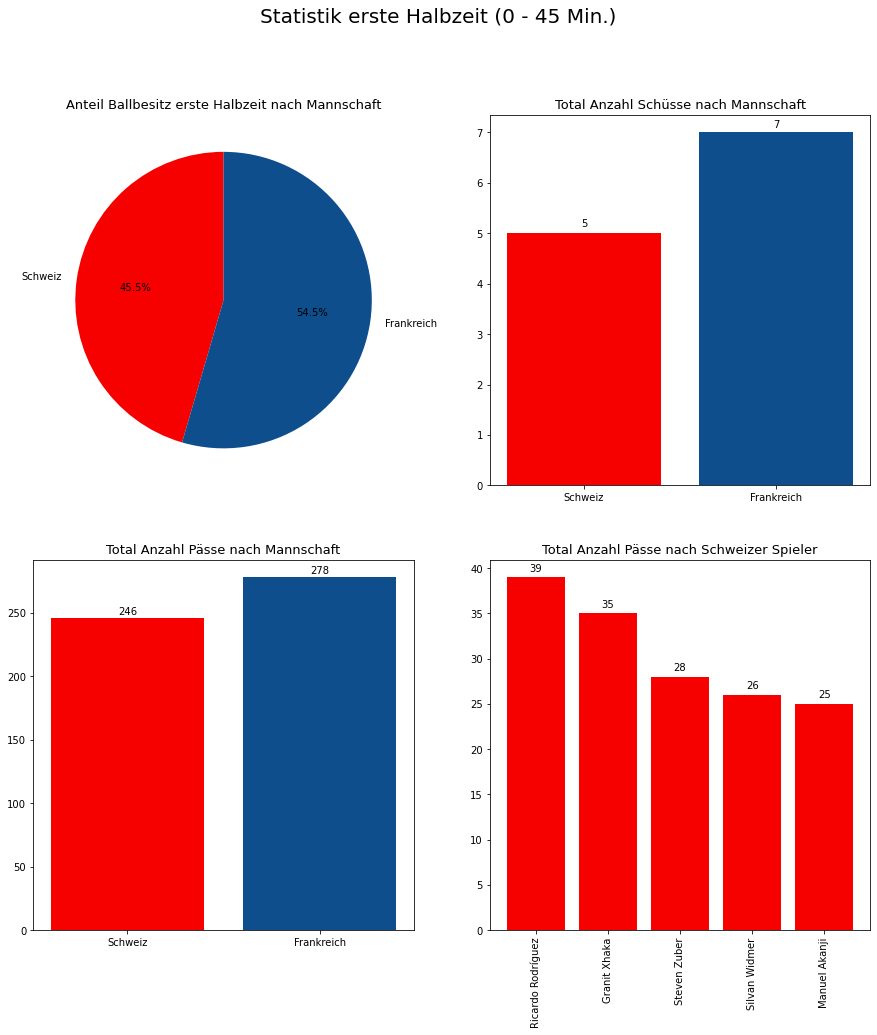

In [69]:
# Graphics 1st half

# Defining Variables
pie_possession_first = np.array([perc_possession_swiss1, perc_possession_france1])

shots_first = np.array([5,7])

passes_first = np.array([246,278])

passes_player_first = np.array([39,35,28,26,25])

labels_player = ["Ricardo Rodríguez",
                 "Granit Xhaka",
                 "Steven Zuber",
                 "Silvan Widmer",
                 "Manuel Akanji"]

labels = ["Schweiz", "Frankreich"]

colors = ['#F70000', '#0F4E8C']

# Define Grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
fig.suptitle('Statistik erste Halbzeit (0 - 45 Min.)', fontsize = 20)

# 1st graph
ax1.pie(pie_possession_first,
        labels = labels,
        autopct = '%1.1f%%',
        startangle = 90,
        colors = colors
       )

ax1.set_title("Anteil Ballbesitz erste Halbzeit nach Mannschaft", fontsize = 13)

# 2nd graph
ax2.bar(labels, shots_first, color = colors)
ax2.text(0,shots_first[0]+0.2,"5",ha = "center", va = "center")
ax2.text(1,shots_first[1]+0.15,"7",ha = "center", va = "center")
ax2.set_title("Total Anzahl Schüsse nach Mannschaft", fontsize = 13)

# 3rd graph:
ax3.bar(labels, passes_first, color = colors)
ax3.text(0,passes_first[0]+5,"246",ha = "center", va = "center")
ax3.text(1,passes_first[1]+5,"278",ha = "center", va = "center")
ax3.set_title("Total Anzahl Pässe nach Mannschaft", fontsize = 13)

# 4th graph:
ax4.bar(labels_player, passes_player_first, color = colors[0])
ax4.set_xticklabels(labels_player, rotation=90)
ax4.text(0,passes_player_first[0]+1,"39",ha = "center", va = "center")
ax4.text(1,passes_player_first[1]+1,"35",ha = "center", va = "center")
ax4.text(2,passes_player_first[2]+1,"28",ha = "center", va = "center")
ax4.text(3,passes_player_first[3]+1,"26",ha = "center", va = "center")
ax4.text(4,passes_player_first[4]+1,"25",ha = "center", va = "center")
ax4.set_title("Total Anzahl Pässe nach Schweizer Spieler", fontsize = 13)

fig.show()

### Kontext

Wenn die Schüsse auf und neben das Tor in der ersten Hälfte in einer Zeitreihe dargestellt werden, kann man daraus interpretieren, dass keine Mannschaft eine klare Druckphase in dieser Hälfte der Spielzeit hatte. Es kann aus der Grafik abgelesen werden, dass die Schüsse mehr oder weniger gleichmässig verteilt sind. Ansonsten wäre ersichtlich, dass eine der beiden Mannschaften mehrere Schüsse nacheinander getätigt hätte. Allerdings kann auch gesagt werden, dass vor und nach dem 1:0 der Schweiz, das in der Grafik in einem dunkleren rot dargestellt wird (14. Minute), Ruhe vor beiden Toren herrschte.

In [70]:
# Shot Statistics by minute 1st half
import plotly.express as px

shots_first_line = events.query("type_name == 'Shot' and period == 1")
shots_first_line = shots_first_line[["minute", "team_name"]]
shots_first_line["value"] = 1

fig = px.scatter(shots_first_line, x="minute", y="value",
                 size="value", color="team_name",
                 hover_name="team_name", size_max=15,
                 width=900, height=250)

fig.update_layout(
    title='Schüsse auf und neben das Tor in der ersten Hälfte',
    title_x=0.45,
    xaxis=dict(
        title='Minutes',
        gridcolor='white',
        gridwidth=1,
    ),
    yaxis=dict(
        title = '',
        gridwidth=1,
    ),
    #paper_bgcolor='rgb(243, 243, 243)',
    #plot_bgcolor='rgb(243, 243, 243)',
)

fig.update_yaxes(showticklabels=False, range=[0,2])
fig.update_xaxes(tickvals=[0,5,10,15,20,25,30,35,40,45], range=[0,48])

fig.show()

### Druckbereiche erste Hälfte nach Mannschaft

### Kontext

In den untenstehenden Grafiken ist ersichtlich wo die beiden Mannschaften den Druck aufgebaut haben. Der Spielverlauf geht für beide Mannschaften von links nach rechts.

Die franzözische Mannschaft hat den Druck gegen die Schweizer klar über die Flügel und durch die Mitte aufgebaut. Besonders gefährlich für die schweizerische Mannschaft war der Druckbereich in der Mitte der eigenen Hälfte. Da der Druckaufbau immer das Ziel hat den Ball zu erobern, wäre ein Balllverlust in diesem Bereich für die Schweizer womöglich vernichtend. Die Franzosen würden den Ball in der gegnerischen Hälfte eroberen, könnten  direkt in das Offensivspiel umschalten und wären innerhalb kurzer Zeit vor dem Tor.

### Methodische Aspekte

Durch die reichhaltigen Attribute von Eventdaten können vertieftere und detailiertere Aspekte der Spiele analysiert werden. Beispielsweise ermöglichen es die Positionsattribute der Eventdaten, die Position von bestimmten Ereignissen positionsgetreu zu rekonstruieren und so deren Anteile zu berechenen. Die Aufbereitung und Visualisierung der Druck-Events, ermöglichen es somit genauer zu sehen wo eine Mannschaft Druck aufgebaut hat.

In [71]:
switzerland_color = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                       ['#e3aca7', '#c03a1d'], N=10)

france_color = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

sub_plots = [{'team':'France', 'minute_start':0, 'minute_end':49, 'color': '#0F4E8C', 'title': 'First half', 'color': france_color},
             {'team':'Switzerland','minute_start':0, 'minute_end':49, 'color': '#F70000', 'title': 'First half', 'color': switzerland_color}]

sub_plots_df = pd.DataFrame(sub_plots)


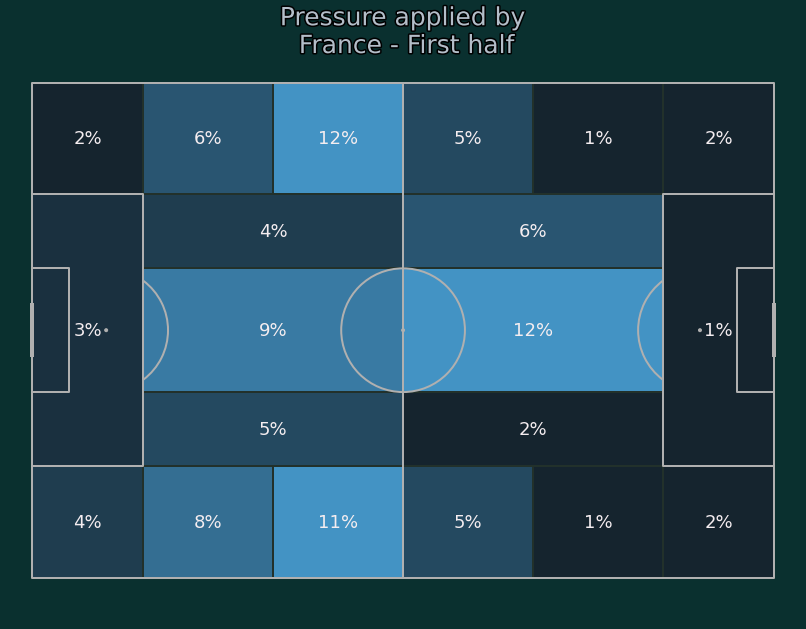

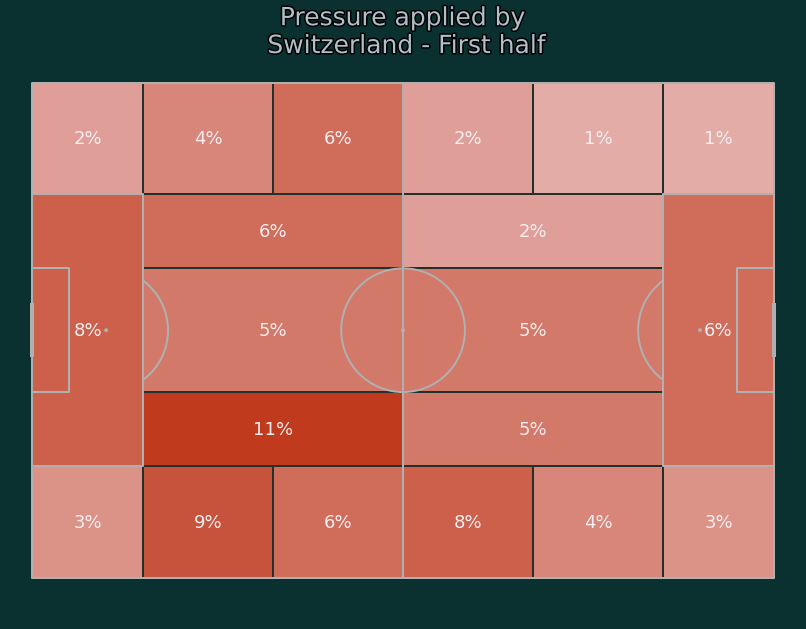

In [72]:
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]


for i in range(len(sub_plots)):
    
    df = events[(events['team_name'] == sub_plots_df.loc[i, 'team']) & (events['type_name'] == 'Pressure') &
                (events['minute'] >= sub_plots_df.loc[i,'minute_start']) &
                (events['minute'] <= sub_plots_df.loc[i,'minute_end'])]
    df = df.loc[:, ['x', 'y']]
    
    pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#0A302F')
    fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                          title_height=0.08, title_space=0,
                          axis=False,
                          grid_height=0.84)
    fig.set_facecolor('#0A302F')

    bin_statistic = pitch.bin_statistic_positional(df['x'], df['y'], 
                                                   statistic='count',
                                                   positional='full', normalize=True)
    pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                            cmap=sub_plots_df.loc[i, 'color'], edgecolors='#22312b')
    labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                                 ax=axs['pitch'], ha='center', va='center',
                                 str_format='{:.0%}')


    axs['title'].text(0.5, 0.5, f"Pressure applied by\n {sub_plots_df.loc[i, 'team']} - {sub_plots_df.loc[i, 'title']}", color='#dee6ea',
                      c='#B4BEC9', va='center', ha='center', path_effects=path_eff, fontsize=25)


## Balleroberungen der Schweiz in der 1. Halbzeit

### Kontext

In untenstehender Abbildung ist ersichtlich, in welchen Bereichen des Spielfeldes die Schweizer Mannschaft Balleroberungen realisieren konnte. Für die Interpretation der Grafik sollten die Druckbereiche und die Balleroberungen zusammen analysiert und verglichen werden. 

Das Ziel jedes Druckaufbaus ist es, der gegnerischen Mannschaft den Ball abzunehmen indem man den gegnerischen Spieler wenig Zeit sowie Raum lässt und sie somit fehleranfällig werden. Die Schweizerische Mannschaft hat wie in obenstehender Grafik ersichtlich vor allem im Bereich des rechten Flügels Druck auf Frankreich ausgeübt. Vergleich man dies mit den Balleroberungen die in untenstehender Grafik illustriert sind, war dies eine erfolgreiche Strategie. Die Schweiz hat erkannt, dass die Franzosen mit Rabiot, Griezmann und Mbappé über diese Seite versuchen ihre Angriffe zu lancieren und hat demensprechend den Druck auf dieser Seite erfolgreich aufgebaut.

### Methodische Aspekte

Währenddem die Positionsattribute der Eventdaten es ermöglichen, unterschiedliche Bereiche des Spielfelds bezüglich eines Aspekts (beispielsweise Druckausübung) zu vergleichen, besteht zudem die Möglichkeit einzelne Ereignisse genau auf deren Standort auf dem Spielfeld zurückzuführen. So können die Standorte von Balleroberungen herausgefunden und visualisiert werden und mit den Einsichten der Druckbereiche verglichen werden, was Aussagen über die Effizienz der Pressings ermöglicht.

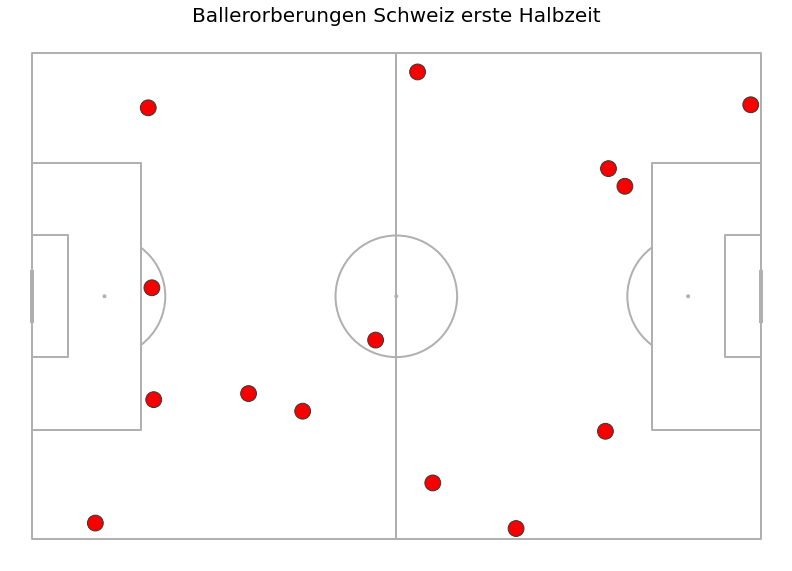

In [73]:
df_recovery = events[(events['type_name'] == 'Ball Recovery') & (events['period'] <3)].copy()

def period_allocator(x):
    
    if (x >= 0) & (x <= 49):
        return 'First half'
    
    elif (x >= 45) & (x <= 75):
        return 'Second half (until 75 minute)'
    
    elif (x >= 76) & (x <= 96):
        return 'Second half (75 until end of second half)'
    
    else:
        return 'Overtime/Penalty'
    

df_recovery['plot_period'] = df_recovery.apply(lambda x: period_allocator(x['minute']), axis=1)
    
    
color_dict = {'First half': '#F70000', 
           'Second half (until 75 minute)':'#F70000', 
           'Second half (75 until end of second half)': '#F70000',
           'Overtime/Penalty': '#8C0E03'}

df_recovery['color'] = df_recovery['plot_period'].map(color_dict)
    

df_fra = df_recovery[df_recovery['team_name'] == 'France']
df_sui_1 = df_recovery[(df_recovery['team_name'] == 'Switzerland') & (df_recovery['plot_period'] == 'First half')]


pitch = Pitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(12, 8))


pitch.scatter(df_sui_1['x'], df_sui_1['y'], c=df_sui_1['color'],
              s=250,
              label='Erste Halbzeit',
              cmap='plasma_r',
              edgecolors='#383838',
              ax=ax)


txt = ax.text(x=60, y=-6, s='Ballerorberungen Schweiz erste Halbzeit',
              size=20, color='black',
              va='center', ha='center')



## Passnetzwerk erste Hälfte nach Mannschaft

### Kontext

Das Passnetzwerk visualisiert den durchschnittlichen (Median) Standort der jeweiligen Spieler anhand derer Ereignisse. Die Grösse der einzelnen Punkte sowie die Grösse der Linien repräsentiert zudem die kumulierte Anzahl an erhaltenen und gegebenen Pässen auf. 

Bei der französischen Mannschaft ist ersichtlich, dass es ihr Ziel war über die linke Seite mit Griezmann und Rabiot Offensivaktionen zu starten und den letzten Ball dann auf Mbappé zu spielen. Rückblickend kann gesagt werden, dass diese Strategie in der ersten Hälfte nicht aufgegangen ist. 

Die Schweizer Mannschaft auf der anderen Seite weist ein wesentlich breiteres Passnetzwerk auf. Vorwiegend haben die Schweizer über die linke Seite mit Rodriguez und Zuber gespielt. Granit Xhaka diente im Mittelfeld als Dreh- und Angelpunkt. Was darauf verweisen mag, dass das Spiel breit gemacht wurde, um Lücken zu suchen und von diesen mittels schnellen Offensivaktionen zu profitieren.


### Methodische Aspekte

Jedes Passereignis in den Eventdaten verfügt über den Passgebenden wie auch Passerhaltenden. Die Eventdaten der einzelnen Ereignisse (Pass, Schuss, Druck usw.) verfügen zudem über Ergebnissattribute, welche darüber Informationen geben, ob das Ereignis erfolgreich war, indem beispielsweise ein Pass beim Mitspieler angekommen ist oder ein Schuss in einem Tor resultierte. Diese Gegebenheit ermöglicht es, für gezielte Ereignisse zu filtern und diese mittels den Positionsattributen zu verbinden. Resultierend kann so ein Passnetzwerk erstellt werden. 

Das Passnetzwerk kann so eine entscheidende Rolle dabei spielen, um besser zu verstehen über welche Spieler das Spiel lief, über welche Seiten vornehmlich gespielt wurde und so dabei helfen kann Rückschlüsse auf die Strategie / Taktik der jeweiligen Mannschaft zu erhalten.

In [74]:
events.loc[events['tactics_formation'].notnull(), 'tactics_id'] = events.loc[events['tactics_formation'].notnull(), 'id']

events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[['tactics_id', 'tactics_formation']].ffill()

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
players['position_abbreviation'] = players.position_id.map(formation_dict)

sub = events.loc[(events['type_name'] == 'Substitution'),['tactics_id', 'player_id', 
                                            'substitution_replacement_id',
                                            'substitution_replacement_name']]
players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')

players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([players, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]


# add on the position the player was playing in the formation to the events dataframe
events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])

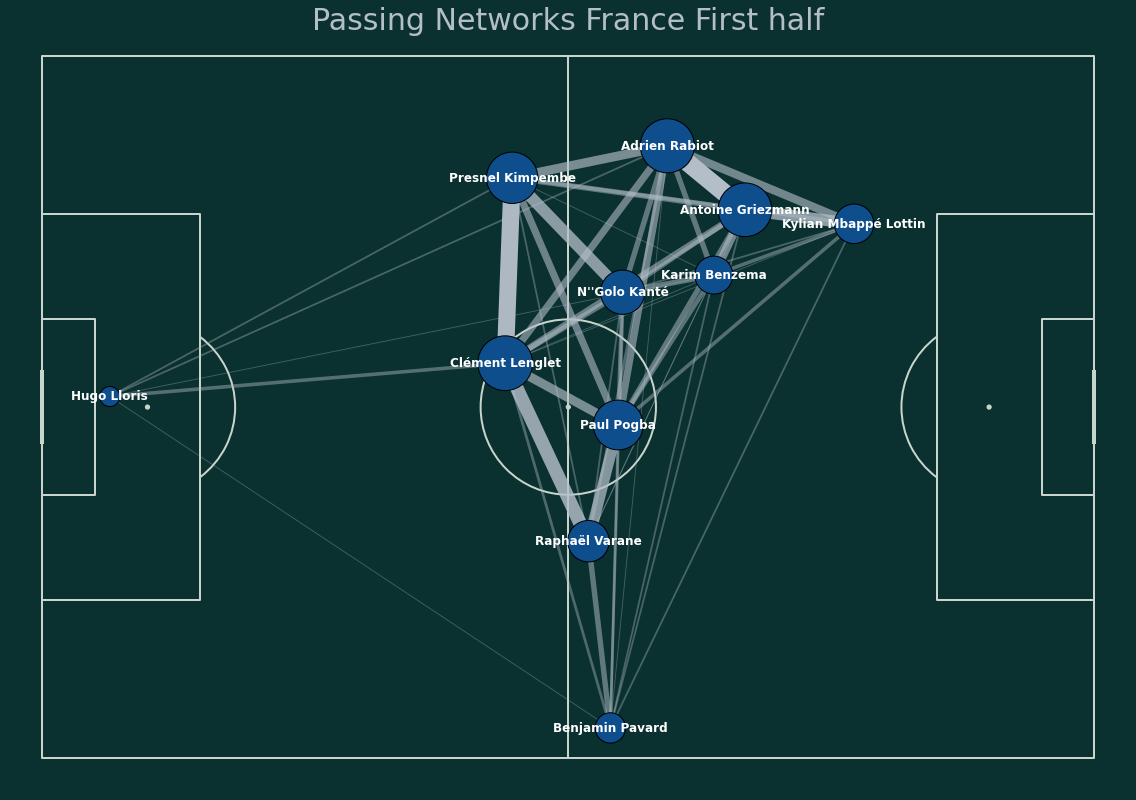

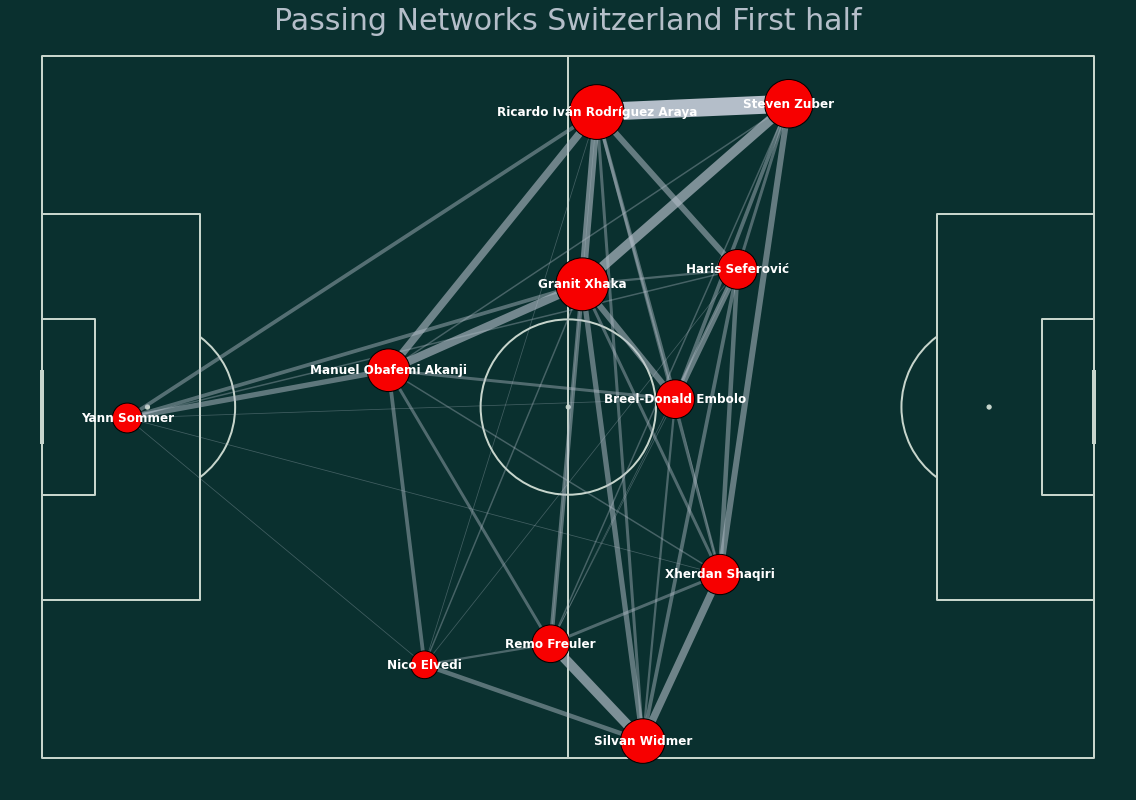

In [75]:
sub_plots = [{'team':'France', 'formation': 3412, 'period':1, 'minute_start':0, 'minute_end':49, 'color': '#0F4E8C', 'title_minutes': 'First half'},
             {'team':'Switzerland', 'formation': 3412, 'period':1, 'minute_start':0, 'minute_end':49, 'color': '#F70000', 'title_minutes': 'First half'}]

sub_plots_df = pd.DataFrame(sub_plots)


for i in range(len(sub_plots_df)):
    pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
    passes_formation = events.loc[(events.team_name == sub_plots_df.loc[i,'team']) & 
                                  (events.type_name == 'Pass') &
                                  (events.tactics_formation == sub_plots_df.loc[i,'formation']) &
                                  (events.position_abbreviation_receipt.notnull()) & 
                                  (events.period == sub_plots_df.loc[i,'period']) &
                                  (events.minute >= sub_plots_df.loc[i,'minute_start']) &
                                  (events.minute <= sub_plots_df.loc[i,'minute_end']), pass_cols].copy()
    
    location_cols = ['position_abbreviation', 'x', 'y', 'player_name']
    location_formation = events.loc[(events.team_name == sub_plots_df.loc[i,'team']) &
                                    (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                    (events.tactics_formation == sub_plots_df.loc[i,'formation']) & 
                                    (events.period == sub_plots_df.loc[i,'period']) &
                                    (events.minute >= sub_plots_df.loc[i,'minute_start']) &
                                    (events.minute <= sub_plots_df.loc[i,'minute_end']), location_cols].copy()
    
    average_locs_and_count = (location_formation.groupby('position_abbreviation')
                         .agg({'x': ['median'], 'y': ['median', 'count']}))

    average_locs_and_count.columns = ['x', 'y', 'count']

    passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                    'position_abbreviation_receipt']]
                                  .max(axis='columns'))

    passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                    'position_abbreviation_receipt']]
                                  .min(axis='columns'))

    passes_between = passes_formation.groupby(['pos_min', 'pos_max'])['id'].count().reset_index()
    passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
    passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                          suffixes=['', '_end'])


    ###

    MAX_LINE_WIDTH = 18
    MAX_MARKER_SIZE = 3000
    passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                               MAX_LINE_WIDTH)
    average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                             / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)
    
    names = location_formation[['position_abbreviation', 'player_name']]

    average_locs_and_count = average_locs_and_count.merge(names, on='position_abbreviation', how='left')

    average_locs_and_count.drop_duplicates(inplace=True)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('#B4BEC9'))
    color = np.tile(color, (len(passes_between), 1))
    c_transparency = passes_between.pass_count / passes_between.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency


    pitch = Pitch(pitch_type='statsbomb', pitch_color='#0A302F', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor("#0A302F")
    pass_lines = pitch.lines(passes_between.x, passes_between.y,
                             passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                               s=average_locs_and_count.marker_size,
                               color=sub_plots_df.loc[i, 'color'], edgecolors='black', linewidth=1, alpha=1, ax=ax)
    
    
    
    for index, row in average_locs_and_count.iterrows():
        
        if (sub_plots_df.loc[i,'title_minutes'] == 'Second half (until minute 75)') and (row.player_name in ['Mario Gavranović', 'Xherdan Shaqiri']):
            text = "Xherdan Shaqiri until 73' \n Mario Gavranović"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Ruben Vargas', 'Steven Zuber']):
            text = "Breel-Donald Embolo until 79' \n Ruben Vargas"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Christian Fassnacht']):
            text = "Steven Zuber until 79' \n Christian Fassnacht"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Ricardo Iván Rodríguez Araya', 'Admir Mehmedi']):
            text = "Ricardo Iván Rodríguez Araya until 87' \n Admir Mehmedi"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Antoine Griezmann', 'Moussa Sissoko']):
            text = "Antoine Griezmann until 88' \n Moussa Sissoko"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
        
        else:
            pitch.annotate(row.player_name, xy=(row.x, row.y), c='white', va='center',
                           ha='center', size=12, weight='bold', ax=ax)
        
    trans = ax.get_xaxis_transform() # x in data untis, y in axes fraction
    pitch.annotate(f"Passing Networks {sub_plots_df.loc[i,'team']} {sub_plots_df.loc[i,'title_minutes']}", xy=(60, 1),
              va='center', ha='center',  fontsize=30, ax=ax, c='#B4BEC9', xycoords=trans)                                                                   


# Zweite Hälfte (45 - 75 min)

### Kontext

Im ersten Teil der zweiten Hälfte übernahm Frankreich das Zepter und übte starken Druck auf die Schweizer Mannschaft aus. Es schien als wären die Franzosen frischer und motivierter aus der Kabine zurückgekehrt. Dies ist bei einem Rückstand von 1:0 und als Fussballweltmeister von 2018 auch verständlich. Didier Deschamps wird die Mannschaft während der Pause auf einen Sieg eingeschworen haben.

Mit 62.8 % Ballbesitz zwischen der 45 - 75 Minute und einem Schussverhältnis von 9:1 für Frankreich, waren sie die dominierende Mannschaft nach der Halbzeitpause. Die Schweizer Mannschaft wurde überrollt und nach 59 Minuten führte Frankreich mit 2:1. Der Druck der Franzosen blieb weiterhin aufrecht und in der 75 Minute erhöhte Paul Pogba auf 3:1.

In [76]:
# 2nd half:
df_second = events[(events['period'] == 2) & (events['minute'] <= 75)]

# Calculating Ball Possession for Switzerland:
swiss_possession_sec2 = df_second[df_second["team_name"]=="Switzerland"]["duration"].sum()
swiss_possession_min2 = swiss_possession_sec2 / 60

# Calculating Ball Possession for France:
france_possession_sec2 = df_second[df_second["team_name"]=="France"]["duration"].sum()
france_possession_min2 = france_possession_sec2 / 60

# Calculating Ball Possession in Percentage:
total_possession_min2 = swiss_possession_min2 + france_possession_min2
perc_possession_swiss2 = (swiss_possession_min2 / (total_possession_min2)) * 100
perc_possession_france2 = (france_possession_min2 / (total_possession_min2)) * 100

In [77]:
# 2nd half Shots:
shots_second_75 = df_second[df_second.type_name=="Shot"].team_name.value_counts()

In [78]:
# 2nd half until 75 shots overall:

shots_second_75 = events.query("type_name == 'Shot' and period == 2 and minute <= 75")
shots_second_75 = shots_second_75[["minute", "team_name", "outcome_name"]]
shots_second_75 = shots_second_75.groupby(["team_name"])["outcome_name"].value_counts()

# 2nd half until 75 shots on target:

shots_second_75_on = events.query("type_name == 'Shot' and period == 2 and outcome_name != 'Off T' and minute < 75")
shots_second_75_on = shots_second_75_on[["minute", "team_name", "outcome_name"]]
shots_second_75_on = shots_second_75_on.groupby(["team_name"])["outcome_name"].value_counts()

In [79]:
# 2nd half until 75 passes:
pass_second_75 = events.query("type_name == 'Pass' and period == 2 and minute <= 75")
pass_second_75 = pass_second_75[["type_name", "team_name"]]
pass_second_75 = pass_second_75.groupby(["team_name"])["type_name"].value_counts()

In [80]:
# Top 5 swiss players by amount of passes
pass_swiss_second_75 = events.query("type_name == 'Pass' and period == 2 and team_name == 'Switzerland' and minute <= 75")
pass_swiss_second_75 = pass_swiss_second_75[["type_name", "team_name", "player_name"]]
pass_swiss_second_75 = pass_swiss_second_75["player_name"].value_counts().sort_values(ascending = False)

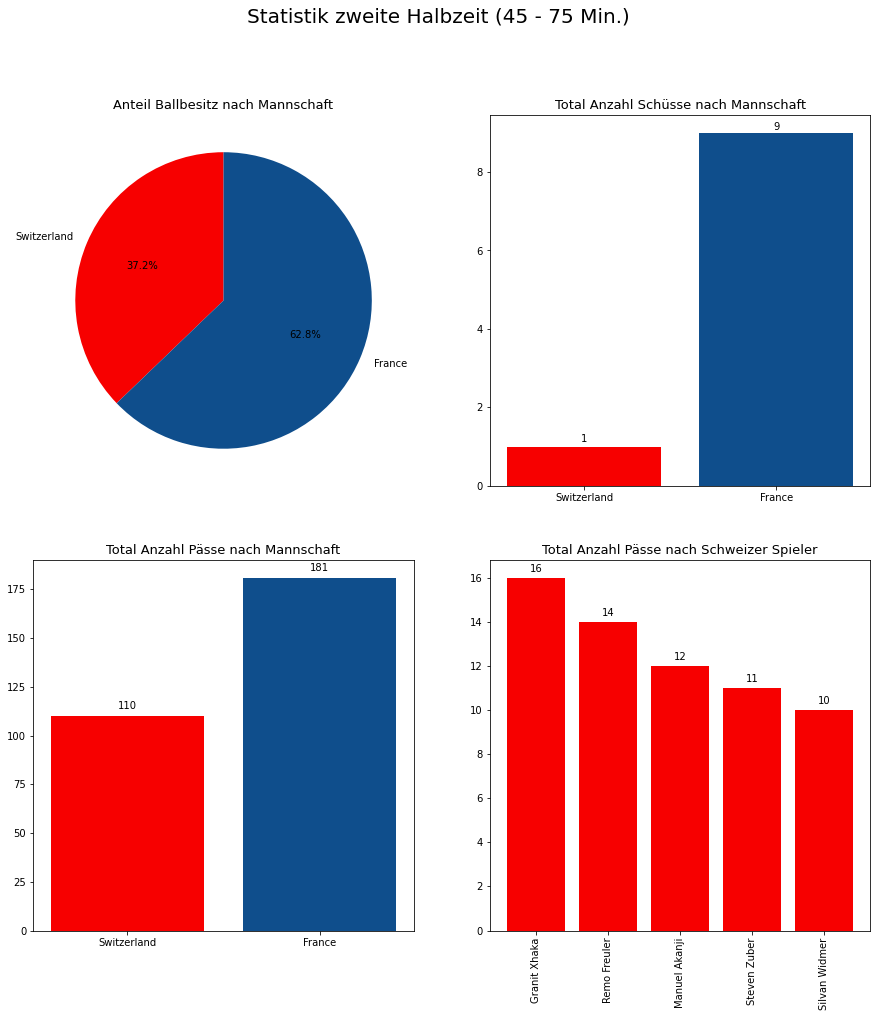

In [81]:
# Graphics 2nd half until minute 75

# Defining Variables
pie_possession_second = np.array([perc_possession_swiss2, perc_possession_france2])

shots_second = np.array([1,9])

passes_second = np.array([110,181])

passes_player_second = np.array([16,14,12,11,10])

labels_player = ["Granit Xhaka",
                 "Remo Freuler",
                 "Manuel Akanji",
                 "Steven Zuber",
                 "Silvan Widmer"]

labels = ["Switzerland", "France"]

colors = ['#F70000', '#0F4E8C']

# Define Grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
fig.suptitle('Statistik zweite Halbzeit (45 - 75 Min.)', fontsize = 20)

# 1st graph
ax1.pie(pie_possession_second,
        labels = labels,
        autopct = '%1.1f%%',
        startangle = 90,
        colors = colors
       )
ax1.set_title("Anteil Ballbesitz nach Mannschaft", fontsize = 13)

# 2nd graph
ax2.bar(labels, shots_second, color = colors)
ax2.text(0,shots_second[0]+0.2,"1",ha = "center", va = "center")
ax2.text(1,shots_second[1]+0.15,"9",ha = "center", va = "center")
ax2.set_title("Total Anzahl Schüsse nach Mannschaft", fontsize = 13)

# 3rd graph:
ax3.bar(labels, passes_second, color = colors)
ax3.text(0,passes_second[0]+5,"110",ha = "center", va = "center")
ax3.text(1,passes_second[1]+5,"181",ha = "center", va = "center")
ax3.set_title("Total Anzahl Pässe nach Mannschaft", fontsize = 13)

# 4th graph:
ax4.bar(labels_player, passes_player_second, color = colors[0])
ax4.set_xticklabels(labels_player, rotation=90)
ax4.text(0,passes_player_second[0]+0.4,"16",ha = "center", va = "center")
ax4.text(1,passes_player_second[1]+0.4,"14",ha = "center", va = "center")
ax4.text(2,passes_player_second[2]+0.4,"12",ha = "center", va = "center")
ax4.text(3,passes_player_second[3]+0.4,"11",ha = "center", va = "center")
ax4.text(4,passes_player_second[4]+0.4,"10",ha = "center", va = "center")
ax4.set_title("Total Anzahl Pässe nach Schweizer Spieler", fontsize = 13)

fig.show()

### Kontext

Bezüglich Schüsse auf und neben das Tor zwischen 45 - 75 Minute war wie oben ebenfalls schon ersichtlich Frankreich klar im Vorteil. Zwischen der 55 und 60 Minute hatte Frankreich eine Druckphase. Ebenfalls gegen Ende der Periode kam Frankreich zu mehr Gelegenheiten. In diesem Teil der zweiten Halbzeit erzielt Frankreich drei Tore, die jeweils in diesen beiden Perioden geschossen wurden.

In [82]:
# Shot Statistics by minute 1st half

shots_second_line = events.query("type_name == 'Shot' and period == 2 and minute <= 75")
shots_second_line = shots_second_line[["minute", "team_name"]]
shots_second_line["value"] = 1

fig = px.scatter(shots_second_line, x="minute", y="value",
                 size="value", color="team_name",
                 hover_name="team_name", size_max=15,
                 width=900, height=250)

fig.update_layout(
    title='Schüsse auf und neben das Tor in der zweiten Hälfte (45 - 75 Minute)',
    title_x=0.46,
    xaxis=dict(
        title='Minutes',
        gridcolor='white',
        gridwidth=1,
    ),
    yaxis=dict(
        title = '',
        gridwidth=1,
    ),
    #paper_bgcolor='rgb(243, 243, 243)',
    #plot_bgcolor='rgb(243, 243, 243)',
)

fig.update_yaxes(showticklabels=False, range=[0,2])
fig.update_xaxes(tickvals=[45,50,55,60,65,70,75], range=[45,75])

fig.show()

## Druckaufbau zweite Hälfte (45 - 75 Minute) nach Mannschaft 

### Kontext

Spannend ist zu sehen, wie sich die Bereiche, in denen der Druck aufgebaut wurde nach der Halbzeitpause verändert haben. Nach dem Kabinengang haben die Franzosen das Zepter übernommen und die Schweizer stark unter Druck gesetzt. Auffällig ist, dass die Franzosen vornehmlich den Druck über die rechte Seite aufgebaut haben. Auf dieser Seite waren Benjamin Pavard und Paul Pogba vorwiegend aktiv. Die Stragie könnte gewesen sein das Aufbauspiel der Schweizer, die mehrheitlich mit Rodriguez und Zuber über diese Seite agiert haben zu unterbinden. Was auch gelungen ist.

Die Druckbereiche der Schweizerischen Mannschaft waren ausgeglichen, die höchsten Werte erzielt die Mitte des Spielfeldes. Während die Angriffe des französischen Teams in der ersten Halbzeit über die Flügel unterbunden wurde, gelang es den Schweizer nicht mehr diese zwischen der 45 und 75 Minute zu unterbinden. 

In [83]:
switzerland_color = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                       ['#e3aca7', '#c03a1d'], N=10)

france_color = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

sub_plots = [{'team':'France', 'minute_start':45, 'minute_end':75, 'color': '#0F4E8C', 'title': 'Second half (until minute 75)', 'color': france_color},
             {'team':'Switzerland', 'minute_start':45, 'minute_end':75, 'color': '#F70000', 'title': 'Second half (until minute 75)','color': switzerland_color}]

sub_plots_df = pd.DataFrame(sub_plots)

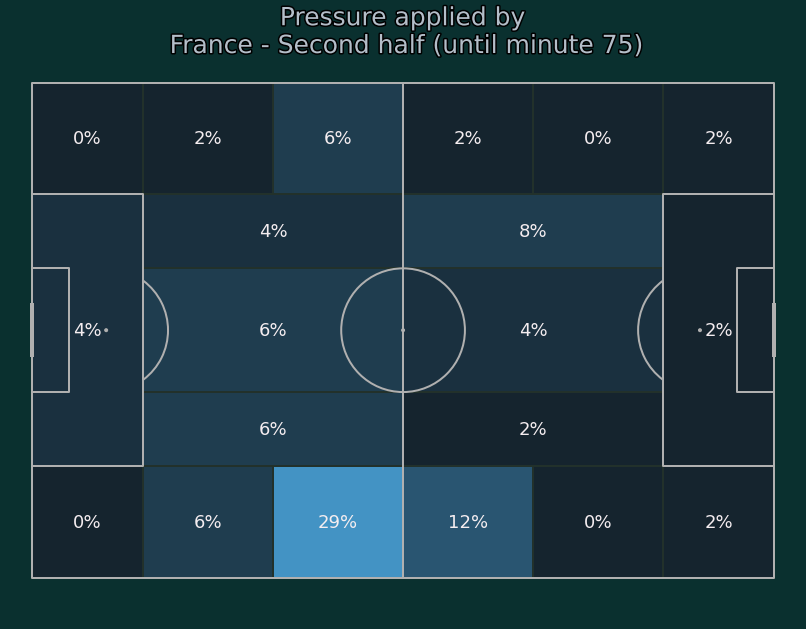

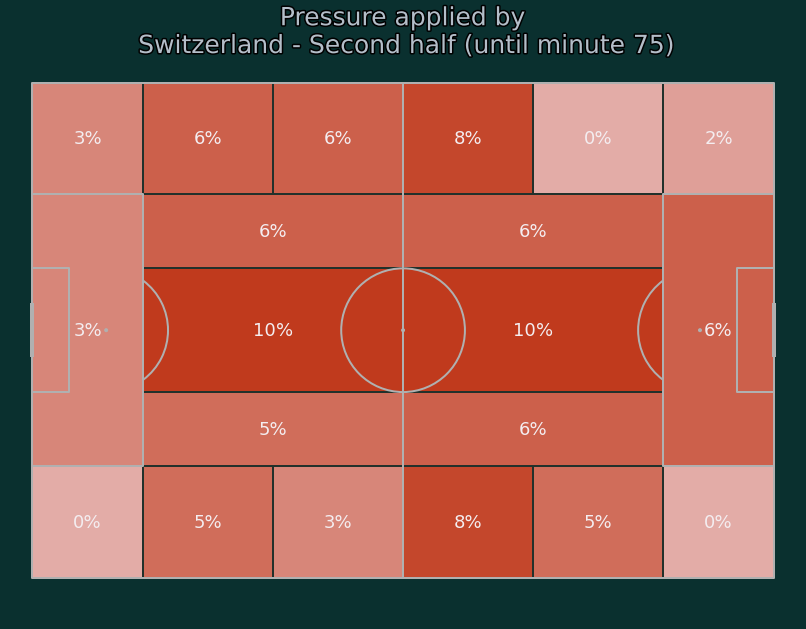

In [84]:
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]


for i in range(len(sub_plots)):
    
    df = events[(events['team_name'] == sub_plots_df.loc[i, 'team']) & (events['type_name'] == 'Pressure') &
                (events['minute'] >= sub_plots_df.loc[i,'minute_start']) &
                (events['minute'] <= sub_plots_df.loc[i,'minute_end'])]
    df = df.loc[:, ['x', 'y']]
    
    pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#0A302F')
    fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                          title_height=0.08, title_space=0,
                          axis=False,
                          grid_height=0.84)
    fig.set_facecolor('#0A302F')

    bin_statistic = pitch.bin_statistic_positional(df['x'], df['y'], 
                                                   statistic='count',
                                                   positional='full', normalize=True)
    pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                            cmap=sub_plots_df.loc[i, 'color'], edgecolors='#22312b')
    labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                                 ax=axs['pitch'], ha='center', va='center',
                                 str_format='{:.0%}')


    axs['title'].text(0.5, 0.5, f"Pressure applied by\n {sub_plots_df.loc[i, 'team']} - {sub_plots_df.loc[i, 'title']}", color='#dee6ea',
                      c='#B4BEC9', va='center', ha='center', path_effects=path_eff, fontsize=25)


## Balleroberungen der Schweiz in der 2. Halbzeit (45 - 75 Minute)

### Kontext

Im ersten Teil der zweiten Halbzeit gelangen der schweizerischen Mannschaft deutlich weniger Balleroberungen. Die Balleroberungen sind wie in der ersten Hälfte mehr oder weniger im selben Bereich angesiedelt. Dies ist die Seite, auf welcher die französische Mannschaft mit Rabiot und Coman angegriffen haben. Auch das untenstehende Passnetzwerk zeigt auf, dass die Angriffe der Franzosen (zwar nicht so stark wie in der ersten Hälfte) zu einem grossen Teil über diese Seite kamen.

Da die Franzosen ihre Strategie etwas geändert haben und ihre Angriffe oft über die Mitte lancierten und dann auf die Seite gespielt haben, galangen ihnen auch die drei Tore in dieser Zeitperiode. Die Schweizer schienen mit dem variantenreichen Spiel der Franzosen nicht mehr klar zu kommen, was deutlich mehr Angriffe und Durchbrüche der Franzosen zur Folge hatte.

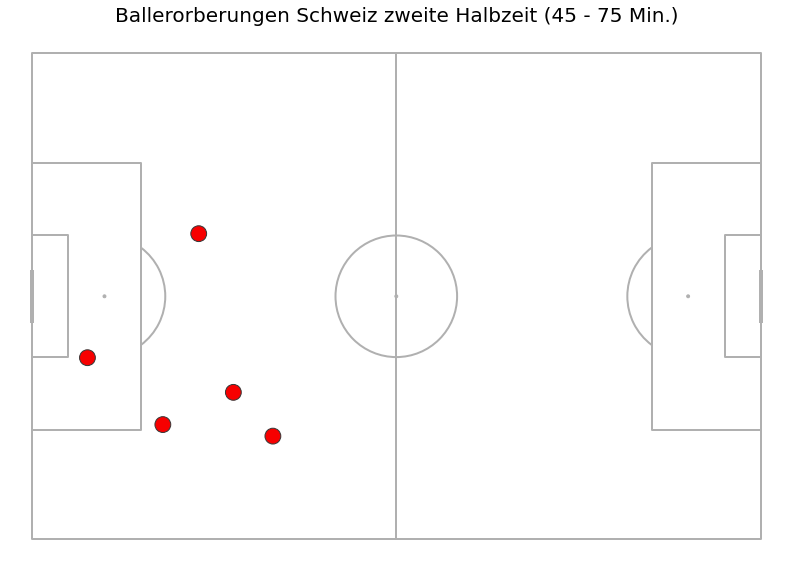

In [85]:
df_recovery = events[(events['type_name'] == 'Ball Recovery') & (events['period'] <3)].copy()

def period_allocator(x):
    
    if (x >= 0) & (x <= 49):
        return 'First half'
    
    elif (x >= 45) & (x <= 75):
        return 'Second half (until 75 minute)'
    
    elif (x >= 76) & (x <= 96):
        return 'Second half (75 until end of second half)'
    
    else:
        return 'Overtime/Penalty'
    

df_recovery['plot_period'] = df_recovery.apply(lambda x: period_allocator(x['minute']), axis=1)
    
    
color_dict = {'First half': '#F70000', 
           'Second half (until 75 minute)':'#F70000', 
           'Second half (75 until end of second half)': '#F70000',
           'Overtime/Penalty': '#8C0E03'}

df_recovery['color'] = df_recovery['plot_period'].map(color_dict)
    

df_fra = df_recovery[df_recovery['team_name'] == 'France']
df_sui_2 = df_recovery[(df_recovery['team_name'] == 'Switzerland') & (df_recovery['plot_period'] == 'Second half (until 75 minute)')]


pitch = Pitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(12, 8))

pitch.scatter(df_sui_2['x'], df_sui_2['y'], c=df_sui_2['color'],
                   s=250,
                   label='Zweite Halbzeit \n(bis 75. Minute)',
                   cmap='plasma_r',
                   edgecolors='#383838',
                   ax=ax)

txt = ax.text(x=60, y=-6, s='Ballerorberungen Schweiz zweite Halbzeit (45 - 75 Min.)',
              size=20, color='black',
              va='center', ha='center')



## Passnetzwerk zweite Hälfte (45 - 75 Minute) nach Mannschaft

### Kontext

Das Passnetzwerk der französischen Mannschaft ist deutlich variantenreicher geworden im Vergleich zu der ersten Halbzeit. Während in der ersten Hälfte das Spiel fast ausschliesslich über links lief (mit Rabiot und Griezmann) agierte zwischen der 45 - 75 Minute Coman an der Stelle von Griezmann, welcher wiederum mehr über die andere Seite des Platzes angriff. Die Franzosen haben so beide Flügel bedient und haben zugleich auch über die Mitte ihre Angriffe lanciert.

Im schweizerischen Passnetzwerk ist klar ersichtlich, dass das Spiel von defensivem Verhalten geprägt war. Die Pässe beschränken sich auf den Bereich der Mittellinie. Wie die Schussstatistik und auch die Tore zeigen, war diese Hälfte der zweiten Halbzeit geprägt vom Druck der französischen Mannschaft, was auch im schweizerischen Passnetzwerk ersichtlich ist. 

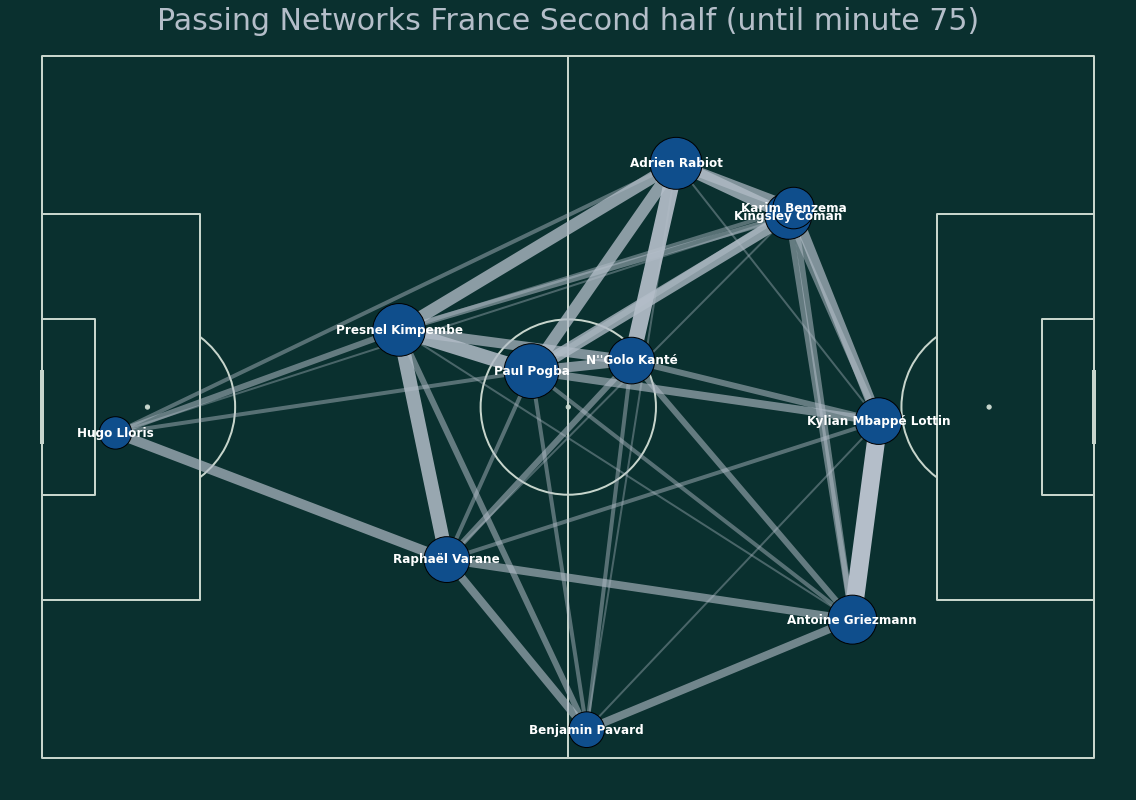

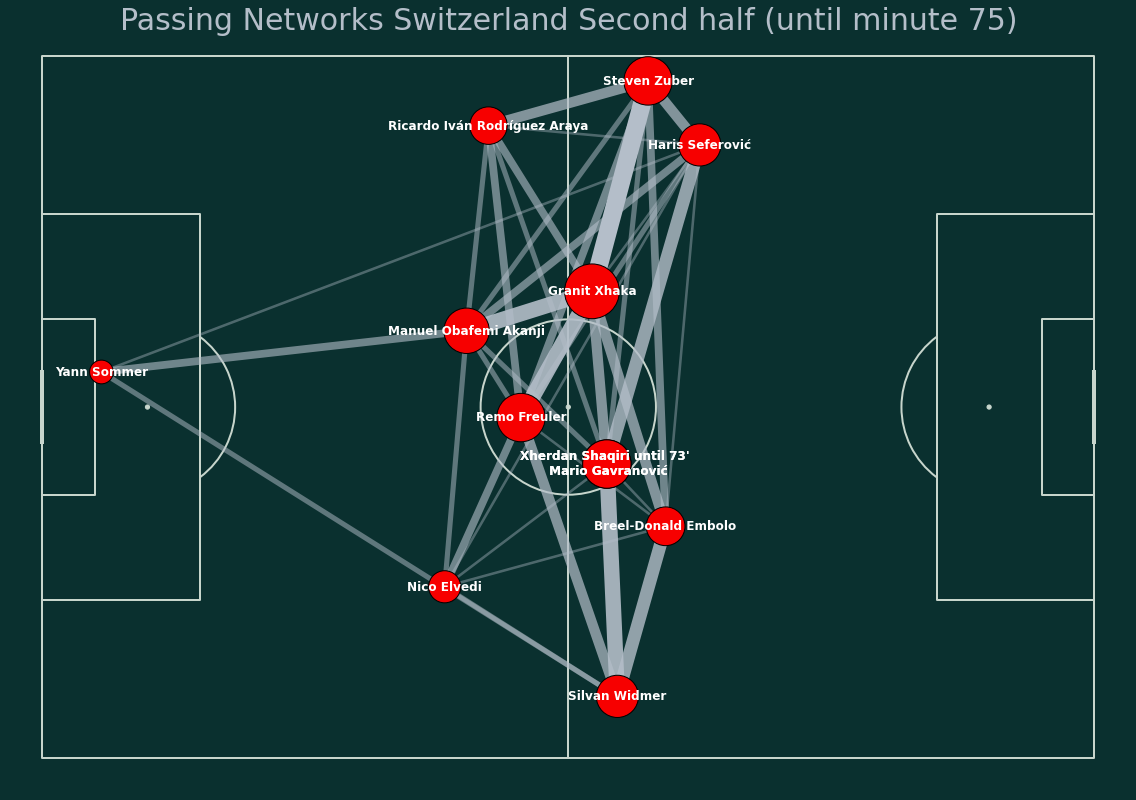

In [86]:
sub_plots = [{'team':'France', 'formation': 442, 'period':2, 'minute_start':45, 'minute_end':75, 'color': '#0F4E8C', 'title_minutes': 'Second half (until minute 75)'},
             {'team':'Switzerland', 'formation': 3412, 'period':2, 'minute_start':45, 'minute_end':75, 'color': '#F70000', 'title_minutes': 'Second half (until minute 75)'}]

sub_plots_df = pd.DataFrame(sub_plots)


for i in range(len(sub_plots_df)):
    pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
    passes_formation = events.loc[(events.team_name == sub_plots_df.loc[i,'team']) & 
                                  (events.type_name == 'Pass') &
                                  (events.tactics_formation == sub_plots_df.loc[i,'formation']) &
                                  (events.position_abbreviation_receipt.notnull()) & 
                                  (events.period == sub_plots_df.loc[i,'period']) &
                                  (events.minute >= sub_plots_df.loc[i,'minute_start']) &
                                  (events.minute <= sub_plots_df.loc[i,'minute_end']), pass_cols].copy()
    
    location_cols = ['position_abbreviation', 'x', 'y', 'player_name']
    location_formation = events.loc[(events.team_name == sub_plots_df.loc[i,'team']) &
                                    (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                    (events.tactics_formation == sub_plots_df.loc[i,'formation']) & 
                                    (events.period == sub_plots_df.loc[i,'period']) &
                                    (events.minute >= sub_plots_df.loc[i,'minute_start']) &
                                    (events.minute <= sub_plots_df.loc[i,'minute_end']), location_cols].copy()
    
    average_locs_and_count = (location_formation.groupby('position_abbreviation')
                         .agg({'x': ['median'], 'y': ['median', 'count']}))

    average_locs_and_count.columns = ['x', 'y', 'count']

    passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                    'position_abbreviation_receipt']]
                                  .max(axis='columns'))

    passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                    'position_abbreviation_receipt']]
                                  .min(axis='columns'))

    passes_between = passes_formation.groupby(['pos_min', 'pos_max'])['id'].count().reset_index()
    passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
    passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                          suffixes=['', '_end'])


    ###

    MAX_LINE_WIDTH = 18
    MAX_MARKER_SIZE = 3000
    passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                               MAX_LINE_WIDTH)
    average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                             / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)
    
    names = location_formation[['position_abbreviation', 'player_name']]

    average_locs_and_count = average_locs_and_count.merge(names, on='position_abbreviation', how='left')

    average_locs_and_count.drop_duplicates(inplace=True)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('#B4BEC9'))
    color = np.tile(color, (len(passes_between), 1))
    c_transparency = passes_between.pass_count / passes_between.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency


    pitch = Pitch(pitch_type='statsbomb', pitch_color='#0A302F', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor("#0A302F")
    pass_lines = pitch.lines(passes_between.x, passes_between.y,
                             passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                               s=average_locs_and_count.marker_size,
                               color=sub_plots_df.loc[i, 'color'], edgecolors='black', linewidth=1, alpha=1, ax=ax)
    
    
    
    for index, row in average_locs_and_count.iterrows():
        
        if (sub_plots_df.loc[i,'title_minutes'] == 'Second half (until minute 75)') and (row.player_name in ['Mario Gavranović', 'Xherdan Shaqiri']):
            text = "Xherdan Shaqiri until 73' \n Mario Gavranović"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Ruben Vargas', 'Steven Zuber']):
            text = "Breel-Donald Embolo until 79' \n Ruben Vargas"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Christian Fassnacht']):
            text = "Steven Zuber until 79' \n Christian Fassnacht"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Ricardo Iván Rodríguez Araya', 'Admir Mehmedi']):
            text = "Ricardo Iván Rodríguez Araya until 87' \n Admir Mehmedi"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Antoine Griezmann', 'Moussa Sissoko']):
            text = "Antoine Griezmann until 88' \n Moussa Sissoko"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
        
        else:
            pitch.annotate(row.player_name, xy=(row.x, row.y), c='white', va='center',
                           ha='center', size=12, weight='bold', ax=ax)
        
    trans = ax.get_xaxis_transform() # x in data untis, y in axes fraction
    pitch.annotate(f"Passing Networks {sub_plots_df.loc[i,'team']} {sub_plots_df.loc[i,'title_minutes']}", xy=(60, 1),
              va='center', ha='center',  fontsize=30, ax=ax, c='#B4BEC9', xycoords=trans)                                                                   
                                                                                      

# Zweite Hälfte (75 - 90 min)

### Kontext

Im zweiten Teil der zweiten Halbzeit erwachte die Schweiz aus dem Tiefschlaf. Die Mannschaft nahm das Schicksal in die eigenen Hände. Dies hat wahrscheinlich auch mit dem Umstand zu tun, dass sich Frankreich seiner Sache schon zu sicher war. Nichtsdestotrotz, war der Ballbesitz und auch die Schüsse beider Mannschaften in dieser Zeitperiode ausgeglichen. 

Diese Zeitperiode wiederspiegelt den eigentlichen Wendepunkt des Spiels - hier soll der Fokus der Analyse gelegt werden. Einerseits hat die Schweiz in der 73. Minute und der 79. Minute insgesamt vier Auswechslungen getätigt und andererseits zwei Tore zum Ausgleich erzielt. 

In [87]:
# 2nd half:
df_second = events[(events['period'] == 2) & (events['minute'] > 75)]

# Calculating Ball Possession for Switzerland:
swiss_possession_sec2 = df_second[df_second["team_name"]=="Switzerland"]["duration"].sum()
swiss_possession_min2 = swiss_possession_sec2 / 60

# Calculating Ball Possession for France:
france_possession_sec2 = df_second[df_second["team_name"]=="France"]["duration"].sum()
france_possession_min2 = france_possession_sec2 / 60

# Calculating Ball Possession in Percentage:
total_possession_min2 = swiss_possession_min2 + france_possession_min2
perc_possession_swiss2_1 = (swiss_possession_min2 / (total_possession_min2)) * 100
perc_possession_france2_1 = (france_possession_min2 / (total_possession_min2)) * 100

In [88]:
# 2nd half Shots:
shots_second_end = df_second[df_second.type_name=="Shot"].team_name.value_counts()

In [89]:
# 2nd half until 75 shots overall:

shots_second_end = events.query("type_name == 'Shot' and period == 2 and minute > 75")
shots_second_end = shots_second_end[["minute", "team_name", "outcome_name"]]
shots_second_end = shots_second_end.groupby(["team_name"])["outcome_name"].value_counts()

# 2nd half until 75 shots on target:

shots_second_end_on = events.query("type_name == 'Shot' and period == 2 and outcome_name != 'Off T' and minute < 75")
shots_second_end_on = shots_second_end_on[["minute", "team_name", "outcome_name"]]
shots_second_end_on = shots_second_end_on.groupby(["team_name"])["outcome_name"].value_counts()

In [90]:
# 2nd half until 75 passes:
pass_second_end = events.query("type_name == 'Pass' and period == 2 and minute > 75")
pass_second_end = pass_second_end[["type_name", "team_name"]]
pass_second_end = pass_second_end.groupby(["team_name"])["type_name"].value_counts()

In [91]:
# Top 5 swiss players by amount of passes
pass_swiss_second_end = events.query("type_name == 'Pass' and period == 2 and team_name == 'Switzerland' and minute > 75")
pass_swiss_second_end = pass_swiss_second_end[["type_name", "team_name", "player_name"]]
pass_swiss_second_end = pass_swiss_second_end["player_name"].value_counts().sort_values(ascending = False)

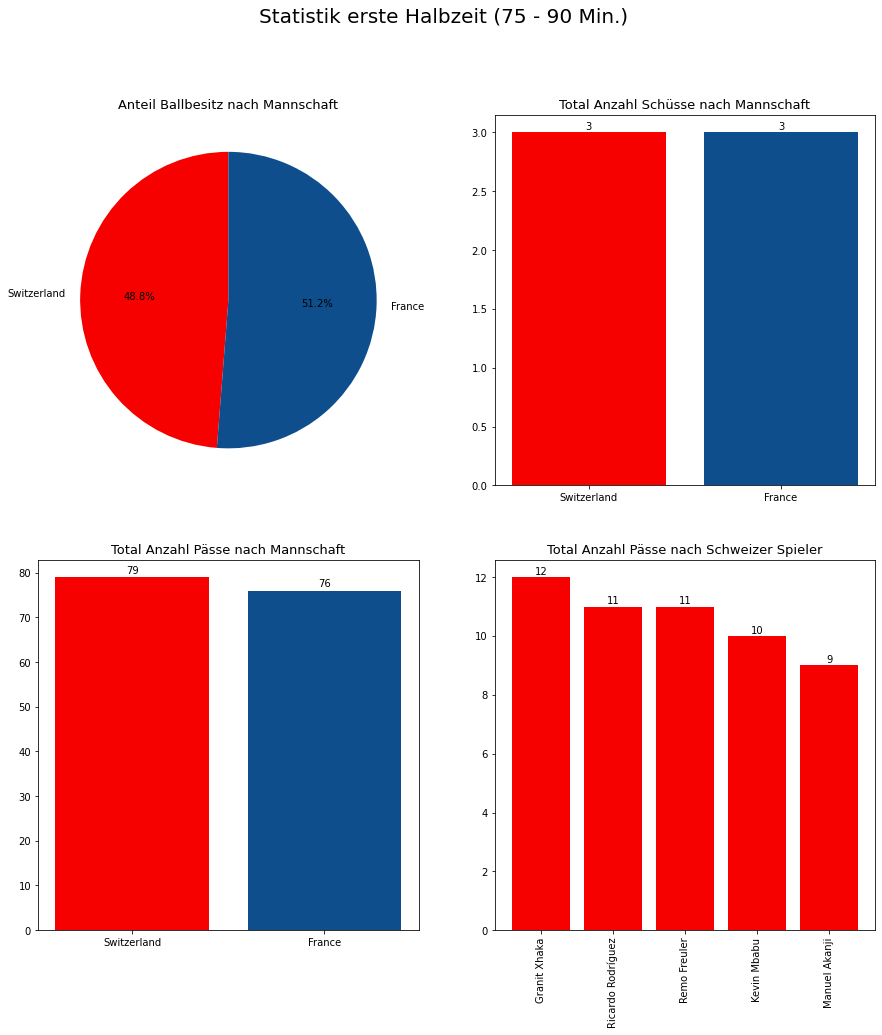

In [92]:
# Graphics 2nd half until minute 75

# Defining Variables
pie_possession_second_end = np.array([perc_possession_swiss2_1, perc_possession_france2_1])

shots_second_end = np.array([3,3])

passes_second_end = np.array([79,76])

passes_player_second_end = np.array([12,11,11,10,9])

labels_player = ["Granit Xhaka",
                 "Ricardo Rodríguez",
                 "Remo Freuler",
                 "Kevin Mbabu",
                 "Manuel Akanji"]

labels = ["Switzerland", "France"]

colors = ['#F70000', '#0F4E8C']


# Define Grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
fig.suptitle('Statistik erste Halbzeit (75 - 90 Min.)', fontsize = 20)

# 1st graph
ax1.pie(pie_possession_second_end,
        labels = labels,
        autopct = '%1.1f%%',
        startangle = 90,
        colors = colors
       )
ax1.set_title("Anteil Ballbesitz nach Mannschaft", fontsize = 13)

# 2nd graph
ax2.bar(labels, shots_second_end, color = colors)
ax2.text(0,shots_second_end[0]+0.05,"3",ha = "center", va = "center")
ax2.text(1,shots_second_end[1]+0.05,"3",ha = "center", va = "center")
ax2.set_title("Total Anzahl Schüsse nach Mannschaft", fontsize = 13)

# 3rd graph:
ax3.bar(labels, passes_second_end, color = colors)
ax3.text(0,passes_second_end[0]+1.5,"79",ha = "center", va = "center")
ax3.text(1,passes_second_end[1]+1.5,"76",ha = "center", va = "center")
ax3.set_title("Total Anzahl Pässe nach Mannschaft", fontsize = 13)

# 4th graph:
ax4.bar(labels_player, passes_player_second_end, color = colors[0])
ax4.set_xticklabels(labels_player, rotation=90)
ax4.text(0,passes_player_second_end[0]+0.2,"12",ha = "center", va = "center")
ax4.text(1,passes_player_second_end[1]+0.2,"11",ha = "center", va = "center")
ax4.text(2,passes_player_second_end[2]+0.2,"11",ha = "center", va = "center")
ax4.text(3,passes_player_second_end[3]+0.2,"10",ha = "center", va = "center")
ax4.text(4,passes_player_second_end[4]+0.2,"9",ha = "center", va = "center")
ax4.set_title("Total Anzahl Pässe nach Schweizer Spieler", fontsize = 13)

fig.show()

### Kontext

Die Schüsse waren in der zweiten Hälfte der zweiten Halbzeit deutlich ausgeglichener verteilt, was auch untenstehende Grafik zeigt. Vor allem in der Schlussphase haben die Schweizer nochmals Druck gemacht, was dann auch zum 3:3 Schlussstand führte.

In [93]:
# Shot Statistics by minute 2nd half - end

shots_second_end_line = events.query("type_name == 'Shot' and period == 2 and minute > 75")
shots_second_end_line = shots_second_end_line[["minute", "team_name"]]
shots_second_end_line["value"] = 1


fig = px.scatter(shots_second_end_line, x="minute", y="value",
                 size="value", color="team_name",
                 hover_name="team_name", size_max=15,
                 width=900, height=250)

fig.update_layout(
    title='Schüsse auf und neben das Tor in der zweiten Hälfte (75 - 90 Minute)',
    title_x=0.46,
    xaxis=dict(
        title='Minutes',
        gridcolor='white',
        gridwidth=1,
    ),
    yaxis=dict(
        title = '',
        gridwidth=1,
    ),
    #paper_bgcolor='rgb(243, 243, 243)',
    #plot_bgcolor='rgb(243, 243, 243)',
)

fig.update_yaxes(showticklabels=False, range=[0,2])
fig.update_xaxes(tickvals=[75,80,85,90,95], range=[75,95])

fig.show()

## Druckaufbau zweite Hälfte (75 - 90 Minute) nach Mannschaft 

### Kontext

Wenn man die Druckbereiche der letzten Hälfte anschaut wird klar, dass die Franzosen grösstenteils in der Defensive agierten und in der Schweizer Hälfte kaum Druck ausübten. Das druckvolle Spiel nach Halbzeitpause war vorbei und man versuchte die Führung zu verteidigen.

Die Schweizer hingegen, haben den Druck auch in der gegenerischen Hälfte aufrechterhalten und vorallem vor dem französischen Tor aggressiv agiert. 

In [94]:
switzerland_color = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                       ['#e3aca7', '#c03a1d'], N=10)

france_color = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

sub_plots = [{'team':'France', 'minute_start':76, 'minute_end':96, 'color': '#0F4E8C', 'title': 'Second half (75 until end of second half)', 'color': france_color},
             {'team':'Switzerland', 'minute_start':76, 'minute_end':96, 'color': '#F70000', 'title': 'Second half (75 until end of second half)', 'color': switzerland_color}]

sub_plots_df = pd.DataFrame(sub_plots)

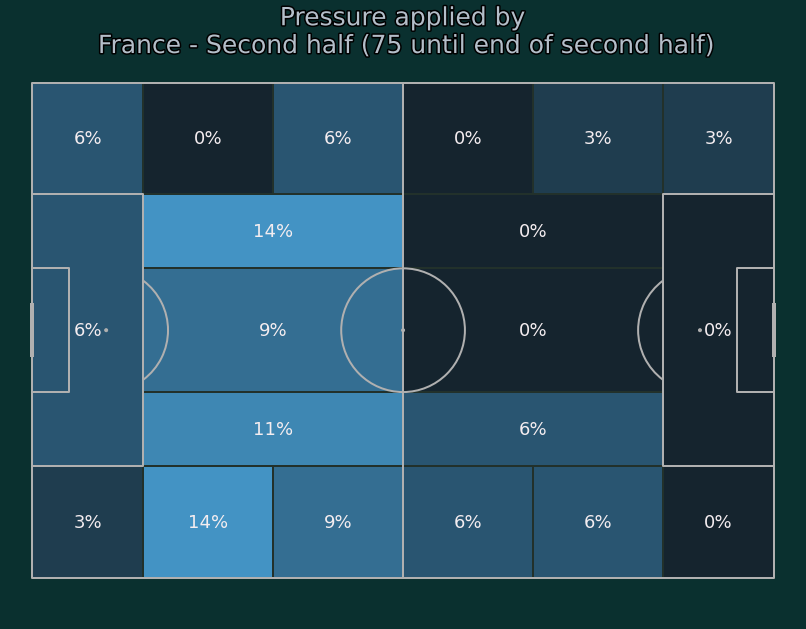

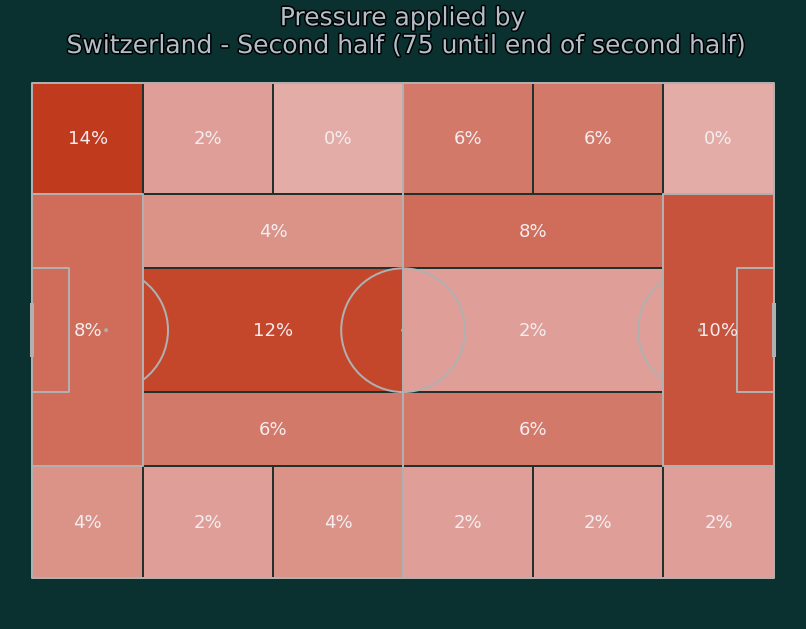

In [95]:
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]


for i in range(len(sub_plots)):
    
    df = events[(events['team_name'] == sub_plots_df.loc[i, 'team']) & (events['type_name'] == 'Pressure') &
                (events['minute'] >= sub_plots_df.loc[i,'minute_start']) &
                (events['minute'] <= sub_plots_df.loc[i,'minute_end'])]
    df = df.loc[:, ['x', 'y']]
    
    pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#0A302F')
    fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                          title_height=0.08, title_space=0,
                          axis=False,
                          grid_height=0.84)
    fig.set_facecolor('#0A302F')

    bin_statistic = pitch.bin_statistic_positional(df['x'], df['y'], 
                                                   statistic='count',
                                                   positional='full', normalize=True)
    pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                            cmap=sub_plots_df.loc[i, 'color'], edgecolors='#22312b')
    labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                                 ax=axs['pitch'], ha='center', va='center',
                                 str_format='{:.0%}')


    axs['title'].text(0.5, 0.5, f"Pressure applied by\n {sub_plots_df.loc[i, 'team']} - {sub_plots_df.loc[i, 'title']}", color='#dee6ea',
                      c='#B4BEC9', va='center', ha='center', path_effects=path_eff, fontsize=25)


## Balleroberungen der Schweiz in der 2. Halbzeit (75 - 90 Minute)

### Kontext

Die Ballerorberugen der Schweizer sind nun deutlich unterschiedlicher als in den anderen Perioden. Da sie mehr Druck ausgeübt haben, haben die Schweizer es geschafft den Franzosen den Ball in der eigenen Hälfte abzunehmen und so haben sich gefährliche Situationen entwickelt.

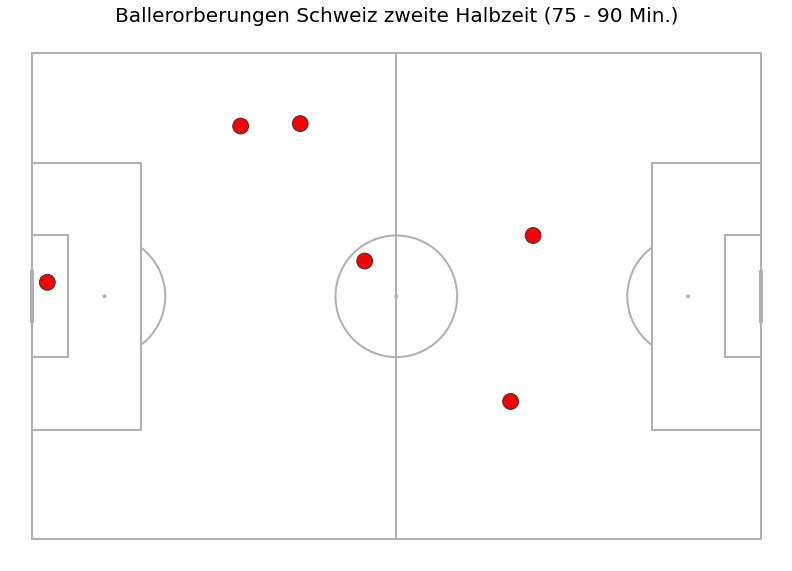

In [96]:
df_recovery = events[(events['type_name'] == 'Ball Recovery') & (events['period'] <3)].copy()

def period_allocator(x):
    
    if (x >= 0) & (x <= 49):
        return 'First half'
    
    elif (x >= 45) & (x <= 75):
        return 'Second half (until 75 minute)'
    
    elif (x >= 76) & (x <= 96):
        return 'Second half (75 until end of second half)'
    
    else:
        return 'Overtime/Penalty'
    

df_recovery['plot_period'] = df_recovery.apply(lambda x: period_allocator(x['minute']), axis=1)
    
    
color_dict = {'First half': '#F70000', 
           'Second half (until 75 minute)':'#F70000', 
           'Second half (75 until end of second half)': '#F70000',
           'Overtime/Penalty': '#8C0E03'}

df_recovery['color'] = df_recovery['plot_period'].map(color_dict)
    

df_fra = df_recovery[df_recovery['team_name'] == 'France']
df_sui_3 = df_recovery[(df_recovery['team_name'] == 'Switzerland') & (df_recovery['plot_period'] == 'Second half (75 until end of second half)')]


pitch = Pitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(12, 8))


pitch.scatter(df_sui_3['x'], df_sui_3['y'], c=df_sui_3['color'],
                   s=250,
                   label='Zweite Halbzeit \n(75 Min. bis Ende 2. Halbzeit)',
                   cmap='plasma_r',
                   edgecolors='#383838',
                   ax=ax)

txt = ax.text(x=60, y=-6, s='Ballerorberungen Schweiz zweite Halbzeit (75 - 90 Min.)',
              size=20, color='black',
              va='center', ha='center')




## Passnetzwerk zweite Hälfte (75 - 90 Minute) nach Mannschaft

### Kontext

Die beiden Passnetzwerke weisen nun eine höhere Variabiliät auf. Die Franzosen wie auch die Schweizer agierten über beide Flügel. Das französische Passnetzwerk deutet allerdings darauf hin, dass die Spieler im Vergleich zu den anderen Perioden deutlich defensiver standen. 

Die Schweizer agierten immer noch mehr oder weniger über den linken Flügel mit Rodriguez und Embolo / Vargas. Auch Granit Xhaka hat sich im Passnetzwerk dieser Seite mehr angenähert als in den anderen Perioden. Man kann aber auch sehen, dass die rechte Seite mit Mbabu, Elvedi und im Zentrum Freuler deutlich öfter mit Pässen interagiert haben. Dies deutet auch darauf hin, dass das Spiel der Schweizer über beide Flügel variantenreicher wurde.

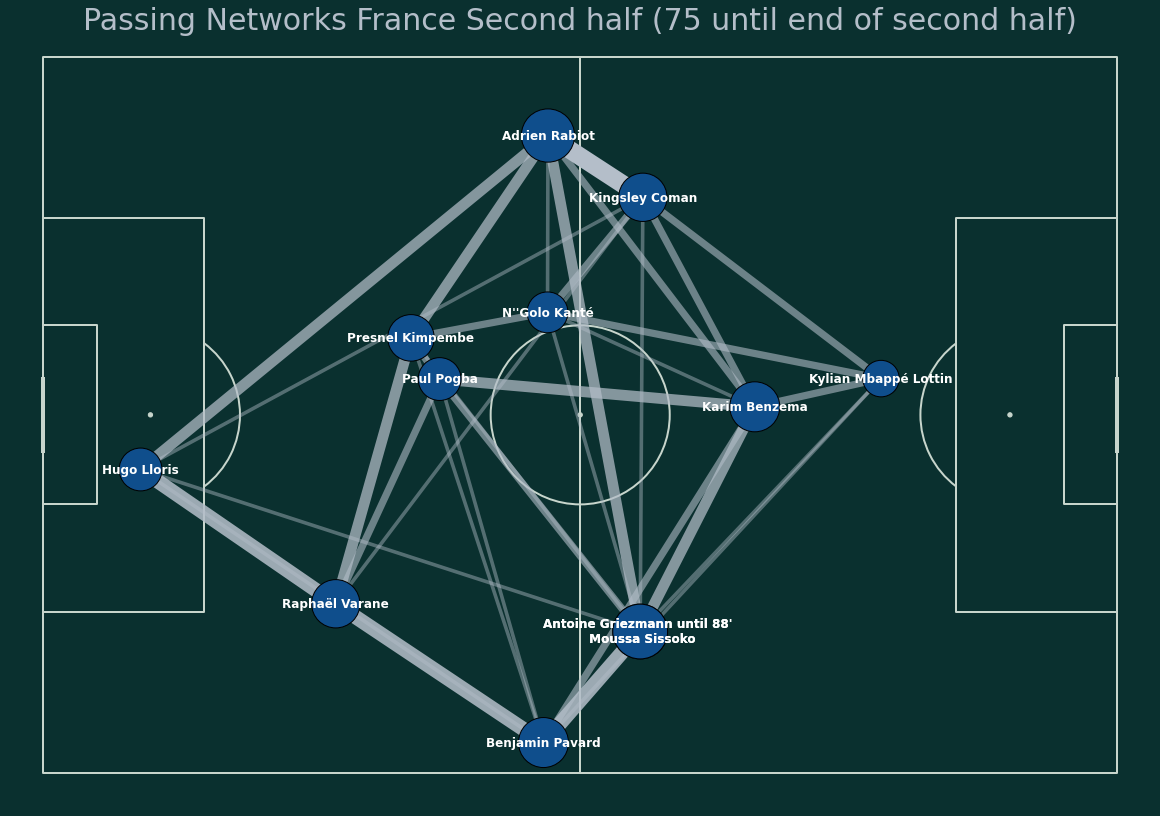

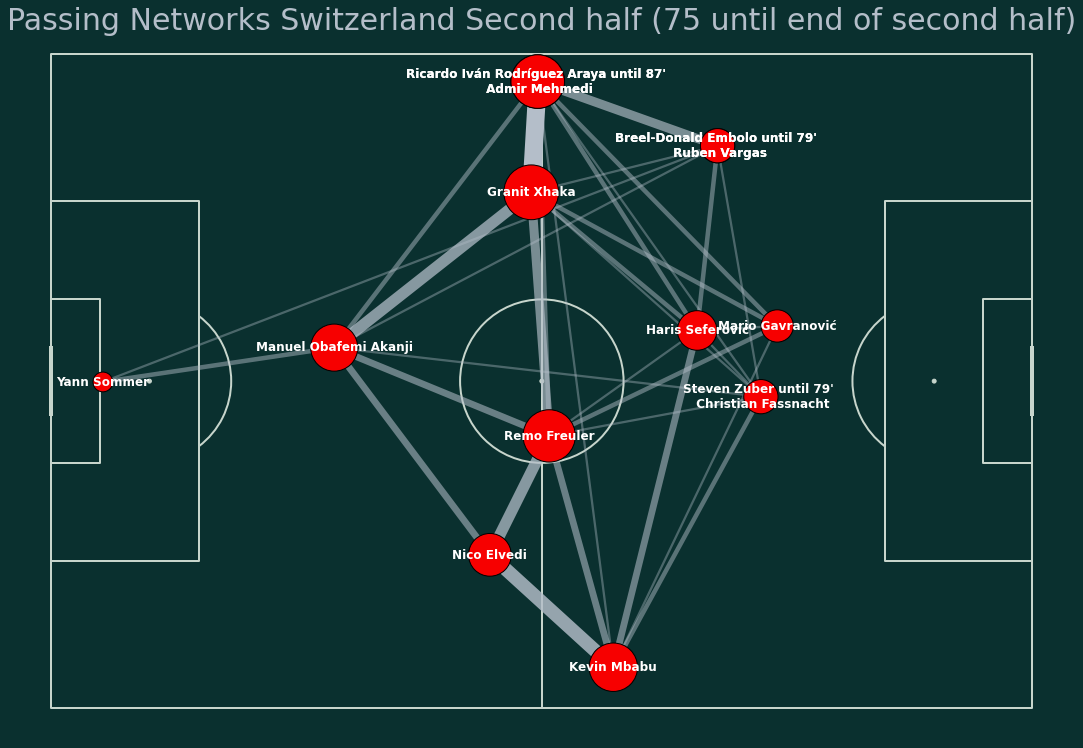

In [97]:
sub_plots = [{'team':'France', 'formation': 442, 'period':2, 'minute_start':76, 'minute_end':96, 'color': '#0F4E8C', 'title_minutes': 'Second half (75 until end of second half)'},
             {'team':'Switzerland', 'formation': 3412, 'period':2, 'minute_start':76, 'minute_end':96, 'color': '#F70000', 'title_minutes': 'Second half (75 until end of second half)'}]

sub_plots_df = pd.DataFrame(sub_plots)


for i in range(len(sub_plots_df)):
    pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
    passes_formation = events.loc[(events.team_name == sub_plots_df.loc[i,'team']) & 
                                  (events.type_name == 'Pass') &
                                  (events.tactics_formation == sub_plots_df.loc[i,'formation']) &
                                  (events.position_abbreviation_receipt.notnull()) & 
                                  (events.period == sub_plots_df.loc[i,'period']) &
                                  (events.minute >= sub_plots_df.loc[i,'minute_start']) &
                                  (events.minute <= sub_plots_df.loc[i,'minute_end']), pass_cols].copy()
    
    location_cols = ['position_abbreviation', 'x', 'y', 'player_name']
    location_formation = events.loc[(events.team_name == sub_plots_df.loc[i,'team']) &
                                    (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                    (events.tactics_formation == sub_plots_df.loc[i,'formation']) & 
                                    (events.period == sub_plots_df.loc[i,'period']) &
                                    (events.minute >= sub_plots_df.loc[i,'minute_start']) &
                                    (events.minute <= sub_plots_df.loc[i,'minute_end']), location_cols].copy()
    
    average_locs_and_count = (location_formation.groupby('position_abbreviation')
                         .agg({'x': ['median'], 'y': ['median', 'count']}))

    average_locs_and_count.columns = ['x', 'y', 'count']

    passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                    'position_abbreviation_receipt']]
                                  .max(axis='columns'))

    passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                    'position_abbreviation_receipt']]
                                  .min(axis='columns'))

    passes_between = passes_formation.groupby(['pos_min', 'pos_max'])['id'].count().reset_index()
    passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
    passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                          suffixes=['', '_end'])


    ###

    MAX_LINE_WIDTH = 18
    MAX_MARKER_SIZE = 3000
    passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                               MAX_LINE_WIDTH)
    average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                             / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)
    
    names = location_formation[['position_abbreviation', 'player_name']]

    average_locs_and_count = average_locs_and_count.merge(names, on='position_abbreviation', how='left')

    average_locs_and_count.drop_duplicates(inplace=True)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('#B4BEC9'))
    color = np.tile(color, (len(passes_between), 1))
    c_transparency = passes_between.pass_count / passes_between.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency


    pitch = Pitch(pitch_type='statsbomb', pitch_color='#0A302F', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor("#0A302F")
    pass_lines = pitch.lines(passes_between.x, passes_between.y,
                             passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                               s=average_locs_and_count.marker_size,
                               color=sub_plots_df.loc[i, 'color'], edgecolors='black', linewidth=1, alpha=1, ax=ax)
    
    
    
    for index, row in average_locs_and_count.iterrows():
        
        if (sub_plots_df.loc[i,'title_minutes'] == 'Second half (until minute 75)') and (row.player_name in ['Mario Gavranović', 'Xherdan Shaqiri']):
            text = "Xherdan Shaqiri until 73' \n Mario Gavranović"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Ruben Vargas', 'Steven Zuber']):
            text = "Breel-Donald Embolo until 79' \n Ruben Vargas"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Christian Fassnacht']):
            text = "Steven Zuber until 79' \n Christian Fassnacht"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Ricardo Iván Rodríguez Araya', 'Admir Mehmedi']):
            text = "Ricardo Iván Rodríguez Araya until 87' \n Admir Mehmedi"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
            
        elif(sub_plots_df.loc[i,'title_minutes'] == 'Second half (75 until end of second half)') and (row.player_name in ['Antoine Griezmann', 'Moussa Sissoko']):
            text = "Antoine Griezmann until 88' \n Moussa Sissoko"
            pitch.annotate(text, xy=(row.x, row.y), c='white', va='center',
                       ha='center', size=12, weight='bold', ax=ax)
        
        else:
            pitch.annotate(row.player_name, xy=(row.x, row.y), c='white', va='center',
                           ha='center', size=12, weight='bold', ax=ax)
        
    trans = ax.get_xaxis_transform() # x in data untis, y in axes fraction
    pitch.annotate(f"Passing Networks {sub_plots_df.loc[i,'team']} {sub_plots_df.loc[i,'title_minutes']}", xy=(60, 1),
              va='center', ha='center',  fontsize=30, ax=ax, c='#B4BEC9', xycoords=trans)                                                                   
                                                                                      

## Die Einwechslung von Gavranovic für Shaqiri

### Kontext

Zwischen der 73 und 79 Minute gingen bei den Schweizer vier Einwechslungen vonstatten. So wurde unteranderem der  Mittelfeldspieler Xherdan Shaqiri für den offensiver ausgerichteten Mario Gavranovic ausgewechselt. In der darauffolgenden Spielzeit erzielten die Schweizer Elf in knapp 10 Minuten zwei Tore. Aufgrund dieser Tatsache und in Anbetracht, dass es der eingewechselte Gavranovic war, welcher in der 90 Minute den Ausgleichstreffer erzielte, sind wir der Meinung, dass die Einwechslungen massgebend zum Comeback beigetragen haben und damit ein interessanter Faktor für weitere Analysen darstellen.

Im folgenden Abschnitt gilt es das Verhalten von Shaqiri und Gavranovic mittels Kennzahlen sowie visueller Elemente fassbar zu machen und damit die Grundlage für einen quantitativen und qualitativen Vergleich der beiden Spieler zu ermöglichen. Ausgangslage dafür bieten die Eventdaten beider Spieler. In beiden Fällen werden Events aus einer Zeitspanne von 20 Minuten berücksichtigt. Währenddem es sich bei Gavranovic um die verbleibenden 20 Minuten der regulären Spielzeit nach seiner Einwechslung handelt, werden bei Shaqiri seine letzten 20 Spielminuten in Betracht gezogen. 

## Heatmap - Spielausrichtung von Shaqiri und Gavranovic im Vergleich

### Kontext

In einem ersten Schritt wollen wir uns anschauen, wo die beiden Spieler auf dem Fussballfeld ihre Aktionen (sog. Events) hatten. Um dies zu tun nutzen wir das Location Attribut der jeweiligen Events und bilden die entsprechenden Punkte in Form einer Heatmap ab. 

Mit einer Heatmap sind wir aber nicht nur in der Lage nachzuvollziehen, wo ein jeweilige Spieler seine Aktionen erbrachte, sondern gewinnen mithilfe unterschiedlicher Farbsättigung ebenfalls eine visuelle Repräsentation in welchen Räumen viele oder wenige Spielaktionen stattfanden.

In [98]:
from urllib.request import urlopen

from matplotlib.colors import LinearSegmentedColormap, to_rgba
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from PIL import Image
from highlight_text import ax_text

from mplsoccer import VerticalPitch, Pitch, add_image, FontManager, Sbopen, Radar, grid

import pandas as pd
import json
import os
import numpy as np
import seaborn as sns

In [99]:
parser = Sbopen()
events, related, freeze, players = parser.event(3794691)

In [100]:
events_shaqiri = events[(events['minute']>=52) & (events['minute']<=72) & (events['player_name']=='Xherdan Shaqiri')]

# Events ohne x und y Koordinaten werden entfernt
events_shaqiri_without_nan = events_shaqiri[(~events['x'].isna()) & (~events['y'].isna())]
df_location_shaqiri = events_shaqiri_without_nan[['x', 'y']]

In [101]:
events_gavranovic = events[(events['player_name']=='Mario Gavranović') & (events['period'] <=2)]

# Events ohne x und y Koordinaten werden entfernt
events_gavranovic_without_nan = events_gavranovic[(~events['x'].isna()) & (~events['y'].isna())]
df_location_gavranovic = events_gavranovic_without_nan[['x', 'y']]

In [102]:
# custom cmap
customcmap = LinearSegmentedColormap.from_list('custom cmap', ['white', 'red'])

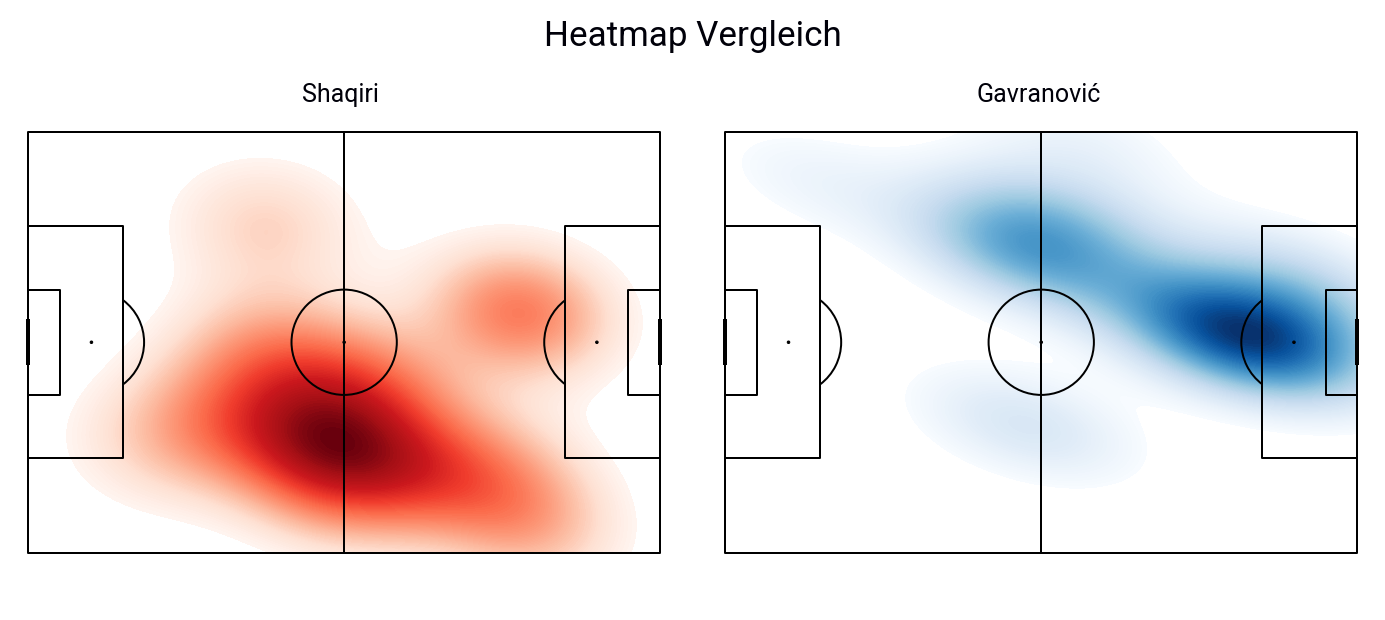

In [103]:
robotto_regular = FontManager()
pitch = Pitch(pitch_color='white', line_color='black', line_zorder=2)
fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)

pitch_shaqiri = pitch.kdeplot(df_location_shaqiri.x, df_location_shaqiri.y, ax=axs['pitch'][0],
                           shade=True, levels=100, shade_lowest=False,
                           cut=4, cmap='Reds')

pitch_gavranovic = pitch.kdeplot(df_location_gavranovic.x, df_location_gavranovic.y, ax=axs['pitch'][1],
                          shade=True, levels=100, shade_lowest=False,
                          cut=4, cmap='Blues')

axs['title'].text(0.5, 0.7, "Heatmap Vergleich", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=35)

axs['title'].text(0.235, 0.1, "Shaqiri", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=25)

axs['title'].text(0.76, 0.1, "Gavranović", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=25)



plt.show()

### Kontext

Vergleicht man die Heatmap von Shaqiri (links) mit jener von Gavranovic (rechts) könnte man unteranderem auf folgende Schlüsse kommen:

- Shaqiri ist relativ zentral, leicht nach rechts ausgerichtet, während Gavranovic überwiegend Aktionen auf der linken Spielachse vorweist. 
- Verglichen mit Gavranovic scheinen die Spielaktionen von Shaqiri grossflächiger gestreut zu sein. Shaqiri weist relativ ausgeglichene Events in der eigenen und gegnerischen Spielhälfte auf. 
- Gavranovic scheint deutlich offensiver ausgerichtet zu sein. Das Mitwirken von Gavranovic konzentriert sich hauptsächlich auf die linke Seite und dem Zentrum der gegnerischen Hälfte.

Basierend auf oben gewonnene Erkenntnisse lässt sich vermuten, dass Gavranovic mehrheitlich offensive Aktionen hatte. Bei Shaqiri sieht das Bild jedoch etwas anders aus. Aufgrund seiner etwas defensiveren Ausrichtung erwarten wir, dass Shaqiri verglichen mit Gavranovic mehr defensive Spielaktionen hatte. Ob dies tatsächlich der Fall war, soll im kommenden Abschnitt untersucht werden.

Mit den Eventdaten sind wir bis zu einem gewissen Punkt limitiert. Uns ist klar, dass wir ohne Trackingdaten nicht nachvollziehen können wo und wie sich ein Spieler auf dem Feld zu jedem Zeitpunkt exakt bewegt hat. Nichtdestotrotz sind wir der Meinung, dass mit einer auf Events basierenden Heatmap ein aussagekräftiges Bild über die Spielausrichtung eines Spielers gewonnen werden kann. 

## Radar Chart - Spielaktionen von Shaqiri und Gavranovic im Vergleich

### Kontext

In der 73 Minute wurde der Torschütze zum 3:3, Mario Gavranovic, für Xherdan Shaqiri eingewechselt. In folgendem Abschnitt schauen wir uns an, welche Aktionen die beiden Nationalspieler während ihrer letzten 20 Minuten in der regulären Spielzeit hatten. Wir beschränken uns bei beiden Fussballern auf eine Zeitspanne von 20 Minuten, um eine faire und sinnvolle Vergleichsbasis zu schaffen.

#### Aktionen von Shaqiri in seinen letzten 20 Spielminuten

In [104]:
events_shaqiri = events[(events['minute']>=52) & (events['minute']<=72) & (events['player_name']=='Xherdan Shaqiri')]

In seinen letzten 20 Minuten Spielzeit hatte Shaqiri 29 Aktionen. Um welche spezifischen Aktionen es sich dabei handelt sieht man in der untenstehenden Tabelle: 

In [105]:
print(events_shaqiri['type_name'].value_counts())

Ball Receipt      8
Pass              7
Carry             7
Ball Recovery     2
Foul Won          1
Substitution      1
Foul Committed    1
Pressure          1
Miscontrol        1
Name: type_name, dtype: int64


In [106]:
events_shaqiri_cnt = pd.DataFrame(events_shaqiri['type_name'].value_counts())
df_events_shaqiri_cnt = events_shaqiri_cnt.reset_index()
df_events_shaqiri_cnt.rename(columns={'type_name': 'type_name_cnt','index':'type_name'}, inplace=True)

#### Aktionen von Gavranović in seinen 20 Spielminuten

In [107]:
events_gavranovic = events[(events['player_name']=='Mario Gavranović') & (events['period'] <=2)]

Der eingewechselte Gavranovic verzeichnete in seinem 20-minütigen Einsatz in der regulären Spielzeit 24 Aktionen. Darunter fällt unteranderem der Schuss zum 3:3 Ausgleichstreffer. 

In [108]:
print(events_gavranovic['type_name'].value_counts())

Ball Receipt     7
Pressure         4
Pass             3
Carry            3
Dribbled Past    1
Duel             1
Offside          1
Shot             1
Dribble          1
Miscontrol       1
Block            1
Name: type_name, dtype: int64


In [109]:
events_gavranovic_cnt = pd.DataFrame(events_gavranovic['type_name'].value_counts())
df_events_gavranovic_cnt = events_gavranovic_cnt.reset_index()
df_events_gavranovic_cnt.rename(columns={'type_name': 'type_name_cnt','index':'type_name'}, inplace=True)

In [110]:
# Parameter bzw. Kriterien, welche wir im Radar Chart abbilden wollen
params = ['Ball Receipt', 'Carry',
       'Pass','Pressure', 'Shot', 'Duel', 'Dribble', 'Ball Recovery']

# Setzen des oberen und unteren Grenzwertes für jeden Parameter
low =  [0, 0, 0, 0, 0, 0, 0, 0]
# high = [10, 10, 10, 5, 2, 2, 2]
high = [10, 10, 10, 10, 10, 10, 10, 10]

#lower_is_better = ['Miscontrol', 'Dispossessed']

In [111]:
values_gavranovic = []
for i in params:
    if i in list(df_events_gavranovic_cnt.type_name):
        index =  list(df_events_gavranovic_cnt.type_name).index(i)
        values_gavranovic.append(df_events_gavranovic_cnt.type_name_cnt[index])
    else:
        values_gavranovic.append(0)
        
#print(values_gavranovic)

In [112]:
values_shaqiri = []
for i in params:
    if i in list(df_events_shaqiri_cnt.type_name):
        index =  list(df_events_shaqiri_cnt.type_name).index(i)
        values_shaqiri.append(df_events_shaqiri_cnt.type_name_cnt[index])
    else:
        values_shaqiri.append(0)
        
#print(values_shaqiri)

In [113]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [114]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = ('https://github.com/google/fonts/blob/3b947ee2732103ef6132b09d234aecd768d2d83c/'
        'apache/roboto/static/Roboto-Thin.ttf?raw=true')
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/google/fonts/blob/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf?raw=true'
robotto_bold = FontManager(URL6)

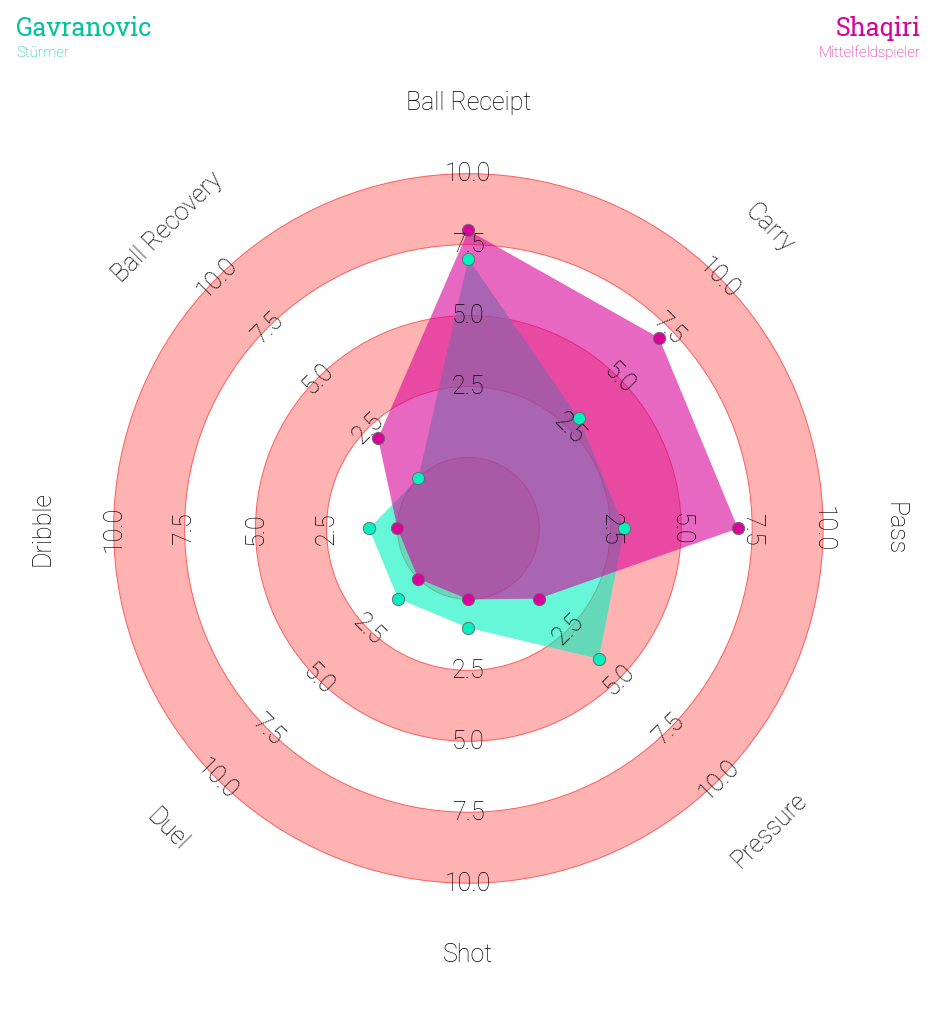

In [115]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(values_gavranovic, values_shaqiri, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_regular.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
title1_text = axs['title'].text(0.01, 0.65, 'Gavranovic', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Stürmer', fontsize=15,
                                fontproperties=robotto_regular.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Shaqiri', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Mittelfeldspieler', fontsize=15,
                                fontproperties=robotto_regular.prop,
                                ha='right', va='center', color='#d80499')

### Kontext

Im Rahmen des Shaqiri / Gavranovic Vergleiches haben wir uns auf acht Kennzahlen sog. Event Typen beschränkt. Jede Achse repräsentiert einen Event Typ und ist mit jeweils einem Datenpunkt pro Spieler versehen. 

Betrachtet man den Radar Chart so sieht man, dass Shaqiri und Gavranovic in den 20 Minuten ungefähr gleich oft mit einem Zuspiel bedient wurden. Verglichen mit Gavranovic hat Shaqiri jedoch deutlich mehr Pässe gespielt, wohingegen Gavranovic mit seinen Bällen vergleichsweise mehr offensive Einzelaktionen wie ein Dribbling, Duel oder 
Schuss suchte. 
Obwohl diese Tatsache für eine offensive Ausrichtung von Gavranovic spricht, gibt uns der Radar Chart nicht genügend Informationen, um dies in Relation mit Shaqiris Spielstil zu setzen. So wäre es beispielsweise in einer weiterführenden Untersuchung interessant zu ermitteln, was für Pässe Shaqiri gespielt hat. Antworten auf Fragen wie "Handelte es sich dabei um Schnittstellen-, Quer- oder Rückpässe?" könnten weitere aussagekräftige Informationen zur Spielintention von Shaqiri geben. 

### Methodische Aspekte

Der Radar Chart bietet die Möglichkeit mehrere quantitative Variablen in einer Abbildung zusammenzufassen. Die Visualisierung erlaubt es Unterschiede und Ähnlichkeiten zwischen verschiedenen Kennzahlen zu identifizieren, wobei der Visualisierungstyp besonders im Vergleich zu herkömmlichen Visualisierungstypen (Bar-Chart) die Aufmerksamkeit der Betrachter auf sich zieht. Der Leser oder die Leserin konzentriert sich so unter anderem beim Interpretieren des Radar Charts schnell auf die generierte Fläche, anstelle sich auf die tatsächlichen Einzelwerte zu konzentrieren. Um jedoch die Möglichkeiten der Visualisierungsformen aufzuzeigen, haben wir uns für den Radar Chart anstelle eines gewöhnlichen Bar Charts entschieden. 

Nichtsdestotrotz liefert der Radar Chart viele interessante Erkenntnisse und Gedankenanstösse. So ist die Tatsache, dass Gavranovic öfters Druck (= Pressure) auf Gegenspieler ausübte, vorallem in Kombination mit vorhergehenden Analysen ein sehr interessanter Fakt. Vergleicht man beispielsweise Pressuremaps und Passnetzwerke der drei unterschiedlichen Spielphasen, so lässt sich erkennen, dass die Schweizer vorallem gegen Ende der Partie früher bzw. bereits vermehrt in der gegnerischen Spielhälfte Druck auf die Franzosen ausübten. Die Tatsache, dass der offensiv ausgerichtet Gavranovic vermehrt Pressure Events vorweist, unterstützt die oben beschriebene Umstellung zu einer aggresiveren und höher stehenden Spielausrichtung der Schweizer.

# Fazit

Abschliessend kann gesagt werden, dass die Schweizer Mannschaft an diesem Abend eine grossartige Leistung an den Tag gelegt hat. Gegen den damals amtierenden Weltmeister nach einem 3:1 Rückstand noch ein Unentschieden und den anschliessenden Sieg durch Elfmeterschiessen zu erringen, war sensationell.

Aus der Analyse gehen geschickte Auswechslungen hervor. Die Einwechslung von Gavranovic als Stürmer im Verbund mit Seferovic hat der Offensive der Schweizer zusätzliche Impulse verliehen. Die offensiven Einzelaktionen von Gavranovic haben in der zweiten Hälfte der zweiten Halbzeit dem Schweizer Spiel geholfen den Ausgleich zu erzielen. 

Ebenfalls ist hervorzuheben, dass die Schweizer die eher offensiv eingestellten Franzosen zwischen der 75 und 90 Minute in die Defensive getrieben haben. Während die Franzosen, höchstwahrscheinlich unter Anweisung ihres Trainers in das Defensivspiel übergingen, um die Führung zu verteidigen, ist es den Schweizer gelungen, effektive Vorstösse gegen das französische Tor zu erspielen, die dann eiskalt augenutzt wurden. Betrachtet man alle Schüsse beider Mannschaften, die anhand des "expected goal" KPI errechnet wurden (je grösser der Kreis, desto wahrscheinlicher ist es, das ein Tor passieren sollte), kann festgestellt werden, dass die Schweizer hocheffezient waren im Toreschiessen (siehe untenstehende Abbildung).

In [116]:
pitch = Pitch(pad_top=0.05, pad_right=0.05, pad_bottom=0.05, pad_left=0.05, line_zorder=2)

In [117]:
df_shots = events[(events['type_name'] == 'Shot') & (events['period'] <5)].copy()

df_fra = df_shots[df_shots['team_name'] == 'France'].copy()
df_sui = df_shots[df_shots['team_name'] == 'Switzerland'].copy()

# Shift Coordinates of one team to allow seperate ploting
df_fra['x'] = pitch.dim.right - df_fra['x']
df_fra['y']= pitch.dim.bottom -df_fra['y']

df_shots_agg = pd.concat([df_fra, df_sui])

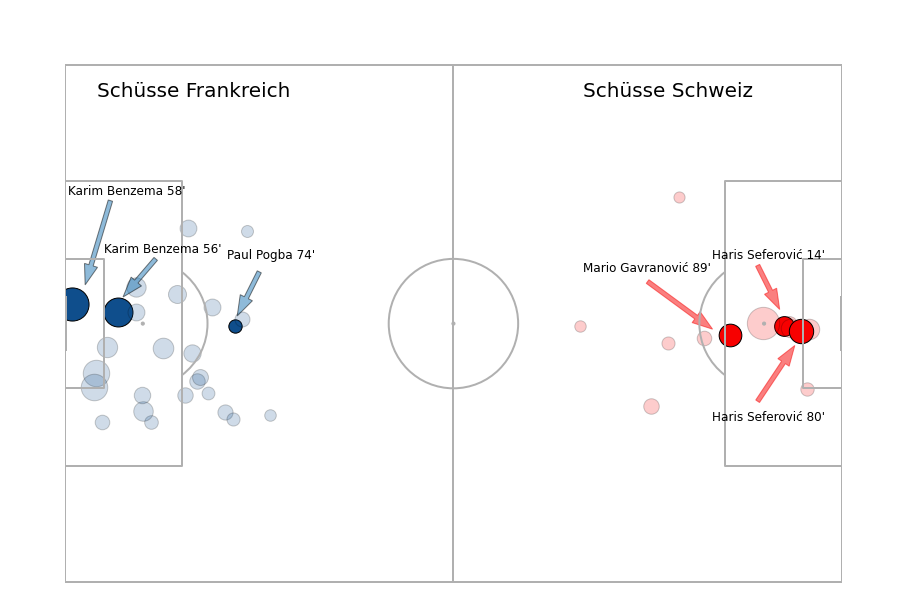

In [118]:
fig, ax = pitch.jointgrid(figheight=10,
                          left=None, 
                          bottom=0.075,
                          marginal=0.1,  
                          space=0,  
                          grid_width=0.9,
                          title_height=0,
                          axis=False,
                          endnote_height=0,
                          grid_height=0.8)  



for i, shot in df_shots_agg.iterrows():
    
    goal = shot['outcome_name']=='Goal'
    team_name = shot['team_name']
    
    circle_size= 10000
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * circle_size ) * 12
    
    team_color = ['#0F4E8C' if team_name == 'France' else '#F70000'][0]

    if goal:
        pitch.scatter(shot['x'], shot['y'], s=circle_size,
                      ec='black', color=team_color, ax=ax['pitch'])
    else:
        pitch.scatter(shot['x'], shot['y'], s=circle_size,
                      ec='black', color=team_color, ax=ax['pitch'], alpha=0.2)
        
        
plt.text(0.5, 20,"Karim Benzema 58'").set_fontsize(12)
plt.arrow(7, 21, -3, 10, width = 0.7, alpha=0.5)
plt.text(6, 29,"Karim Benzema 56'").set_fontsize(12)
plt.arrow(14, 30, -3, 3.5, width = 0.7, alpha=0.5)
plt.text(25, 30,"Paul Pogba 74'").set_fontsize(12)
plt.arrow(30, 32, -2, 4, width = 0.7, alpha=0.5)

plt.text(100, 30,"Haris Seferović 14'").set_fontsize(12)
plt.arrow(107, 31, 2, 4, width = 0.7, alpha=0.5, color='#F70000')
plt.text(100, 55,"Haris Seferović 80'").set_fontsize(12)
plt.arrow(107, 52, 4, -6, width = 0.7, alpha=0.5, color='#F70000')
plt.text(80, 32,"Mario Gavranović 89'").set_fontsize(12)
plt.arrow(90, 33.5, 7.5, 5.5, width = 0.7, alpha=0.5, color='#F70000')

        
plt.text(5, 5, 'Schüsse Frankreich').set_fontsize(20)
plt.text(80, 5, 'Schüsse Schweiz').set_fontsize(20)

Als letzter Punkt ist die Leistung der Mannschaft als Gesamtkonstrukt hervorzuheben. Dies kann anhand der Analyse auf quantitativer Basis nicht eruiert werden. Führt man sich allerdings das Spiel nochmals zu Gemüte fallen diverse nicht quantifizierbare Punkte auf: 

* die Interaktion und den Wille der Schweizer Spieler dieses Spiel noch zu drehen
* den Zusammenhalt und Einsatz für den Mitspieler und die Mannschaft
* die Kommunikationsinhalte auf dem Platz
* den Einfluss der Zuschauer auf das Spiel der Schweizer

Sport ist eine Abwägung zwischen Können und Glück. Dies wurde an diesem Abend emotional unter Beweiss gestellt. Die Schweizer hatten die nötigen fussballerischen Fertigkeiten, aber sicher auch eine Prise Glück, damit sie das Comeback erzielen konnten. An diesem Abend waren die Emotionen nicht nur auf dem Fussballplatz, sondern auch auf den Rängen und auf dem Sofa (oder aus Anspannung auch stehend davor) spürbar. Ein solches Spiel sieht man sich gerne auch etwas mehr als ein Jahr danach gerne an. Wir wünschen viel Spass!